# <p style="text-align: center;">TEAM-14</p><b>



| Name               | SRN         |
| :-----------        | :-----------: |
| Anuj Kanamadi      | 02FE22BCS020  |
| Regina Fernandes   | 02FE22BCS081  |
| Saniya Kadarbhai   | 02FE22BCS106  |
| Shreya Miskin      | 02FE22BCS125  |

# <p style="text-align: center;">Project Title:</p><b>

# <p style="text-align: center;">A Comprehensive Analysis on Influenza(flu) Virus</p><b>

# Background
Influenza viruses are responsible for the extremely contagious respiratory disease known as the flu, which affects millions of people worldwide every year. It can cause serious problems, especially in sensitive people, and manifest as fever, coughing, and muscle aches. Reducing the impact of influenza outbreaks on public health requires effective prediction and control of these events.

# Problem Statement
The objective of this project is to forecast the frequency and severity of influenza cases by analyzing and modeling the Influenza dataset taken from Kaggle. The dataset includes a wealth of data regarding influenza cases, including demographics of the patients, symptoms, diagnosis, status of vaccination, and outcomes.

# Dataset details:
- Total number of instances(rows): 19577 
- Total number of attributes(columns): 19


|Sl.No|Column	|Missing Values	|Type|
|:---------| :-----------        | :-----------: |:-------------:  |
|1|CollectorInstitution|	0	|Categorical|
|2|HostIdentifier|	0|	Categorical|
|3|SampleIdentifier|	0	|Categorical|
|4|CollectionYear	|0	|Categorical|
|5|CollectionSeason|	0	|Categorical|
|6|Country|	0|	Categorical|
|7|State_Province	|230	|Categorical|
|8|City_Local	|35|	Categorical|
|9|SubjectAge|	7	|Numerical|
|10|Gender|	2	|Categorical|
|11|VaccinationStatus	|0	|Categorical|
|12|Fever|	0	|Categorical|
|13|Symptoms	|0	|Categorical|
|14|MedicalConditions	|3580	|Categorical|
|15|Diagnosis	|0|	Categorical|
|16|FluTestStatus	|0	|Categorical|
|17|SampleType	|0	|Categorical|
|18|DiseaseOutcome	|0	|Categorical|
|19|HospitalizationDuration	|4535	|Numerical|

# Inference about missing values:

1. State_Province:
- Inference: There are 230 missing values in this column, implying that state or province information was not provided or recorded for some samples.
- Handling: We could impute missing values with a category such as "Unknown" to represent missing state or province information.
2. City_Local:
- Inference: There are 35 missing values in this column, indicating that local city information was not provided or recorded for some samples.
- Handling: Similar to handling missing state or province information, we could impute missing values with a category such as "Unknown" for city information. 
3. SubjectAge:
- Inference: There are 7 missing values in this column, suggesting that age information was not provided or recorded for a small number of subjects.
- Handling: We could impute missing age values with the mean, median, or mode of the available data, depending on the distribution and characteristics of the age variable. Another approach is to categorize age into groups and impute missing values with the mode or median of the appropriate age group.
4. Gender:
- Inference: There are 2 missing values in this column, indicating that gender information was not provided or recorded for a small number of subjects.
- Handling: We could impute missing gender values with the mode (most frequent category) if there is a dominant gender in the dataset. 
5. VaccinationStatus:
- Inference: There are 4750 missing values in this column. This could indicate that vaccination status information was not collected or not available for a significant portion of the samples.
- Handling: One approach is to impute missing values based on the mode (most frequent category) if there is a dominant vaccination status. Alternatively, we could create a new category such as "Unknown" to represent missing values.
6. MedicalConditions:
- Inference: There are 3580 missing values in this column, indicating that information on medical conditions was not provided or recorded for a significant number of samples.
- Handling: We could impute missing values with a category such as "None" or "Not Applicable" to indicate the absence of medical conditions. Alternatively, if certain medical conditions are more prevalent, we could impute missing values with the mode of the available data.
7. PostVisitMedications:
- Inference: There are 3354 missing values in this column, indicating that information on post-visit medications was not provided or recorded for some samples.
- Handling: We could impute missing values with a category such as "None" or "Not Applicable" to indicate the absence of post-visit medications. Alternatively, if certain medications are more commonly prescribed, we could impute missing values with the mode of the available data.
8. HospitalizationDuration:
- Inference: There are 4535 missing values in this column, indicating that hospitalization duration information was not provided or recorded for some samples.
- Handling: We could impute missing values with a meaningful default value, such as zero if hospitalization did not occur or was not applicable. Alternatively, we could impute missing values based on the mean or median of the available data, but be cautious with this approach as it may introduce bias.

# Library Description

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder 

# Dataset Description

In [2]:
data=pd.read_csv(r"D:\Python for data science\influenza dataset.csv")
data

,CollectorInstitution,HostIdentifier,SampleIdentifier,CollectionYear,CollectionSeason,Country,State_Province,City_Local,SubjectAge,Gender,VaccinationStatus,Fever,Symptoms,MedicalConditions,Diagnosis,FluTestStatus,SampleType,DiseaseOutcome,HospitalizationDuration
0,Johns Hopkins University-CEIRS2,02-13-T-0713,"02-13-T-0713,",1,2,1,Maryland,1,15.0,0,1,1,"diarrhea(Not Provided), myalgia(Not Provided),...","OTH-none,",1,1,"Nasal swab,",1,3.0
1,Johns Hopkins University-CEIRS2,02-23-T-0003,"02-23-T-0003,",1,3,2,Not Collected,1,12.0,0,1,1,"diarrhea(N), myalgia(N), conjunctivitis(N), lo...","OTH-none,",1,1,"Nasal swab,",1,5.0
2,Harvard Medical School,NIGSP_YGA_01068,"NIGSP_YGA_01068,",2,1,3,Massachusetts,2,10.0,1,2,2,",",",",1,1,"NW,",2,3.0
3,Harvard Medical School,NIGSP_YGA_01164,"NIGSP_YGA_01164,",3,1,3,Massachusetts,2,29.0,0,2,2,",",",",1,1,"NW,",2,3.0
4,Johns Hopkins University-CEIRS2,02-13-T-0608,"02-13-T-0608,",1,4,1,Maryland,1,40.0,0,1,1,"diarrhea(N), myalgia(N), conjunctivitis(N), lo...","OTH-none,",1,1,"Nasal swab,",1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19572,"University of Tennessee Medical Center, Memphi...",F5027C21,"470920F,470920D,470920A,470920,470920E,470920B...",10,1,3,Tennessee,1,NaN,1,1,6,"diarrhea(U), cough(U), running nose(U), myalgi...",",,,,,,,,",1,0,"Nasal,Nasal,Nasal,Nasal,Nasal,Nasal,Nasal,Nasal,",4,8.0
19573,"University of Tennessee Medical Center, Memphi...",F5023C21,"470916F,470916,470916G,470916H,470916E,470916B...",10,1,3,Tennessee,1,NaN,1,1,6,"diarrhea(U), cough(U), running nose(U), myalgi...",",,,,,,,,,",1,0,"Nasal,Nasal,Nasal,Nasal,Nasal,Nasal,Nasal,Nasa...",4,9.0
19574,"University of Tennessee Medical Center, Memphi...",F5032C31,"473527H,473527B,473527D,473527C,473527E,473527...",10,1,3,Tennessee,1,NaN,0,1,6,"diarrhea(U), cough(U), running nose(U), myalgi...",",,,,,,,,,",1,1,"Nasal,Nasal,Nasal,Nasal,Nasal,Nasal,Nasal,Nasa...",4,5.0
19575,"University of Tennessee Medical Center, Memphi...",F5033C31,"473528B,473528H,473528,473528D,473528A,473528F...",10,1,3,Tennessee,1,NaN,1,1,6,"diarrhea(U), cough(U), running nose(U), myalgi...",",,,,,,,,,",1,0,"Nasal,Nasal,Nasal,Nasal,Nasal,Nasal,Nasal,Nasa...",4,8.0


# Data Pre-Processing

# Converting Categorical values to Numerical using label encoding

In [3]:
data['Gender'] = data['Gender'].replace({'M': 0, 'F': 1, 'U': 2, 'NP' : 3})


In [4]:
import pandas as pd
import numpy as np

data=pd.read_csv(r"D:\Python for data science\influenza ds.csv")

data['CollectionYear'].replace(['-N/A-,', 
       '-N/A-,-N/A-,', '-N/A-,-N/A-,-N/A-,', '-N/A-,-N/A-,-N/A-,-N/A-,','-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,',
        '-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,','-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,',
        '-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,'], np.nan, inplace=True)

data['CollectionYear'] = data['CollectionYear'].replace({ '2012,':'2012', '2013,':'2013', '2009,':'2009', 
        '2015-2016,':'2015-2016', '2014-2015,':'2014-2015',
       '2010,':'2010', '2009,2009,2011,2011,':'2009-2011', '2011,':'2011',
       '2009,2009,2010,2010,2011,':'2009-2011', '2009,2009,2011,':'2009-2011', '2009,2009,2009,':'2009',
       '2014,':'2014', '2007,':'2007', '2009,2009,':'2009', '2009,2011,':'2009-2011', '2010,2011,':'2010-2011',
       '2011,2011,':'2011', '2006,':'2006', '2008,':'2008', '2009,2010,':'2009-2010',
       '2011,2011,2011,2011,':'2011', '2013,2013,2013,2013,2013,':'2013',
       '2016,2016,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,':'2016',
       '2016,2016,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,':'2016',
       '2016,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,2016,':'2016',
       '2016,2016,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,':'2016',
       '2016,2016,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,':'2016',
       '2011,2011,2011,':'2011',
       '2016,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,2016,':'2016',
       '2016,2016,-N/A-,-N/A-,-N/A-,':'2016', '2012,2012,':'2012',
       '2009,2009,2009,2009,':'2009',
       '2016,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,2016,':'2016',
       '2012,2012,2012,2012,2013,':'2012-2013',
       '2016,2016,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,':'2016',
       '2009,2009,2009,2009,2009,':'2009',
       '-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,2016,2016,':'2016',
       '-N/A-,2016-2017,':'2016-2017', '-N/A-,-N/A-,2015-2016,':'2015-2016',
       '2016-2017,-N/A-,-N/A-,':'2016-2017', '2015-2016,-N/A-,-N/A-,':'2015-2016',
       '2015-2016,-N/A-,-N/A-,-N/A-,':'2015-2017',
       '2011,2011,2011,2011,2011,2011,2011,':'2011', '2009,2009,2010,2011,':'2009-2011',
       '2008,2009,':'2008-2009', '2009,2011,2011,':'2009-2011', '2009,2009,2010,':'2009-2010',
       '2013,2013,2013,2013,':'2013',
       '2016,2016,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,':'2016',
       '2016,-N/A-,-N/A-,-N/A-,-N/A-,2016,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,':'2016',
       '2009,2009,2009,2011,':'2009-2011', '2009,2010,2010,2011,':'2009-2011',
       '2011,2011,2011,2011,2011,':'2011',
       '2016,-N/A-,-N/A-,-N/A-,2016,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,':'2016',
       '2011,2012,':'2011-2012', '-N/A-,2015-2016,':'2015-2016', '2015-2016,-N/A-,':'2015-2016',
       '2012,2012,2012,':'2012', '-N/A-,-N/A-,-N/A-,2015-2016,':'2015-2016', '2016-2017,':'2016-2017',
       '2016-2017,-N/A-,':'2016-2017', '-N/A-,-N/A-,2016-2017,':'2016-2017',
       '2016-2017,-N/A-,-N/A-,-N/A-,':'2016-2017', '2012,2012,2012,2012,':'2012',
       '-N/A-,-N/A-,2015-2016,-N/A-,':'2015-2016', '2009,2009,2009,2009,2009,2009,':'2009',
       '2013,2013,':'2013', '2008,2008,':'2008', '-N/A-,2015-2016,-N/A-,':'2015-2016',
       '2016,-N/A-,-N/A-,-N/A-,2016,':'2016',
       '2016,-N/A-,-N/A-,2016,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,':'2016',
       '-N/A-,2016-2017,-N/A-,':'2016-2017', '-N/A-,-N/A-,-N/A-,2016-2017,':'2016-2017',
       '2010,2010,':'2010', '2016,2016,-N/A-,-N/A-,-N/A-,-N/A-,':'2016',
       '2013,2013,2013,':'2013', '2010,2010,2011,2011,':'2010',
       '2012,2012,2012,2012,2012,':'2012',
       '2010,2010,2010,':'2010', '-N/A-,2015-2016,-N/A-,-N/A-,':'2015-2016',
       '2014,2014,2014,':'2014', '2010,2010,2010,2010,':'2010', '2014,2014,2014,2014,':'2014',
       '2010,2010,2010,2010,2010,':'2010', '2010,2010,2010,2010,2011,':'2010-2011',
       '2013,2013,2013,2013,2014,':'2013-2014', '2014,2014,2014,2014,2014,':'2014',
       '2010,2010,2010,2010,2010,2010,':'2010', '2010,2010,2010,2010,2010,2011,':'2010-2011',
       '2011,2011,2011,2011,2011,2011,':'2011', '2012,2012,2012,2012,2012,2012,':'2012',
       '2013,2013,2013,2013,2013,2013,':'2013', '2013,2013,2013,2013,2013,2014,':'2013-2014',
       '2014,2014,2014,2014,2014,2014,':'2014',
       '2010,2010,2010,2010,2010,2010,2010,':'2010',
       '2012,2012,2012,2012,2012,2012,2012,':'2012',
       '2013,2013,2013,2013,2013,2013,2013,':'2013',
       '2014,2014,2014,2014,2014,2014,2014,':'2014',
       '2011,2011,2011,2011,2011,2011,2011,2011,':'2011',
       '2012,2012,2012,2012,2012,2012,2012,2012,':'2012',
       '2014,2014,2014,2014,2014,2014,2014,2014,':'2014',
       '2014,2014,2014,2014,2014,2014,2014,2014,2014,':'2014',
       '2013,2013,2013,2013,2013,2013,2013,2013,2013,2013,':'2013'})

data['CollectionYear'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22], dtype=int64)

In [5]:
import numpy as np

data['CollectionYear']=data['CollectionYear'].replace({np.nan: 1, '2012':2, '2013':3, '2009':4, '2015-2016':5, '2014-2015':6,
        '2010':7,'2009-2011':8, '2011':9, '2014':10, '2007':11, '2010-2011':12, '2006':13, '2008':14,
       '2009-2010':15, '2016':16, '2012-2013':17, '2016-2017':18, '2015-2017':19,
       '2008-2009':20, '2011-2012':21, '2013-2014':22})


In [6]:
data['City_Local'] = data['City_Local'].replace({'-N/A-':1, 'Boston, MA':2, 'Illinois, Chicago, Cook County':3,
       'San Luis Potosí, San Luis Potosí,San Luis Potosí':4,
       'San Luis Potosí, San Luis Potosí,San Luis Potosi':5, 'Lima,':6,
       'Madre de Dios,':7, 'Tumbes,':8, 'Cusco,':9, 'Boston':10, 'Conroe':11,
       'Bennington':12, 'Hopkinsville':13, 'Weber City':14, 'Washington':15, ',':80,
       'Santa Clara, CA':16, 'Santiago,Santiago':17, 'Puente Alto,Santiago':18,
       'Aberdeen':19, 'Bronx':20, 'Florence':21, 'St. Petersburg':22, 'Louisville':23,
       'Royal Oak':24, 'Tullahoma':25, 'Pekin':26, 'Oberlin':27, 'Newberg':28,
       'Richmond':29, 'Mexico City,Distrito Federal':30, 'Managua,':31, 'Managua':32,
       'Naperville':33, 'Hacienda Heights':34, 'Knoxville':35, 'Fairfield':36,
       'Antofagasta,Santiago':37, 'Dunlap':38, 'Overland Park':39, 'Dale City':40,
       'Lake Zurich':41, 'Toledo':42, 'Lebanon':43, 'Woodinville':44, 'Akron':45,
       'Dyersburg':46, 'Maipu,Santiago':47, 'La Reina,Santiago':48,
       'Granada Hills':49, 'Kandal Province,':50, 'Winston-Salem':51, 'Graham':52,
       'Choctaw':53, 'Rio Grande do Sul,São Gabriel':54,
       'Rioverde, San Luis Potosí,San Luis Potosí':55, 'California':56,
       'N Canto':57,
       'Soledad de Graciano Sánchez, San Luis Potosí,San Luis Potosí':58,
       'Rio Grande do Sul,Cachoeirinha':59, 'Bloomingdale':60, 'Norman':61,
       'Independencia,Santiago':62, 'Madison':63, 'Massachusetts, Boston':64,
       'Columbiana':65, 'Glendale':66, 'Cerro Navia,Santiago':67,
       'Rio Grande do Sul,Venâncio Aires':68, 'Ovalle,Santiago':69,
       'Rio Grande do Sul,Estrela':70, 'Quilicura,Santiago':71,
       'Providencia,Santiago':72, 'Talagante,Santiago':73,
       'Las condes,Santiago':74, 'Rio Grande do Sul,Bagé':75,
       'La Cisterna,Santiago':76, 'Quinta normal,Santiago':77,
       'Peñalolen,Santiago':78, 'Linares,Santiago':79})
n_City_Local = data['City_Local']


In [7]:
import pandas as pd
import numpy as np

data=pd.read_csv(r"D:\Python for data science\influenza ds.csv")

data['CollectionSeason'].replace([ '-N/A-,','-N/A-,-N/A-,-N/A-,-N/A-,',
       '-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,', '-N/A-,-N/A-,-N/A-,', '-N/A-,-N/A-,','-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,',
      '-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,','-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,',
       '-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,',
       '-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,-N/A-,','-N/A,'], np.nan, inplace=True)

data['CollectionSeason'] = data['CollectionSeason'].replace({'2019,2019,':'2019', '2020,2020,':'2020',
    '2018,2018,2018,':'2018', '2019,2019,2019,':'2019', '2020,2020,2020,':'2020',
        '2019,2019,2019,2019,':'2019', '2018,2018,2018,2018,':'2018',
        '2020,2020,2020,2020,':'2020',
        '2018,2018,':'2018', '2018,2017,2017,':'2017-2018',
        '2016-2017,2016-2017,2016-2017,2016-2017,2016-2017,':'2016-2017',
        '2016,2016,2016,2017,2016,2017,2017,2016,':'2016-2017',
        '2016,2016,2016,2017,2018,2016,2017,2018,2018,2016,2017,2017,':'2016-2017',
        '2016,2016,2016,2017,2017,2017,2016,2017,2016,':'2016-2017',
        '2016,2016,2016,2017,2017,2016,2017,':'2016-2017',
        '2016,2016,2017,2016,2017,2016,2017,2016,2017,':'2016-2017',
        '2016,2016,2017,2016,2017,2017,2017,2016,2016,':'2016-2017',
        '2016,2016,2017,2018,2016,2017,2018,2016,2018,2016,2017,2017,':'2016-2018', '2018-2019,2018-2019,2018-2019,':'2018-2019',
        '2016,2016,2016,2017,2016,2017,2017,2017,2016,':'2016-2017',
        '2016,2016,2017,2016,2017,2017,2016,2016,':'2016-2017',
        '2016,2016,2016,2016,2016,':'2016',
        '2016,2016,2016,2017,2018,2016,2017,2018,2016,':'2016-2018',
        '2016-2017,2016-2017,2016-2017,2016-2017,2016-2017,2016-2017,':'2016-2017',
        '2016,2017,2018,2016,2017,2018,2016,2018,2016,2017,2017,2016,':'2016-2018',
        '2016,2016,2016,2017,2017,2017,2017,2016,':'2016-2017',
        '2016,2016,2017,2018,2016,2017,2018,2018,2016,2017,2017,2016,':'2016-2018',
        '2016,2016,2017,2018,2016,2017,2018,2016,2018,2018,2016,2017,2017,':'2016-2018',
        '2016,2016,2016,2017,2016,2017,2016,2017,2017,':'2016-2017',
        '2016,2016,2017,2016,2017,2018,2016,2018,2016,2017,2017,2018,':'2016-2018',
        '2016,2017,2018,2016,2017,2018,2016,2016,2016,':'2016-2018',
        '2016-2017,2016-2017,':'2016-2017', '2017-2018,2017-2018,':'2017-2018',
        '2018-2019,2018-2019,':'2018-2019', '2015-2016,2015-2016,2015-2016,':'2015-2016',
        '2016-2017,2016-2017,2016-2017,':'2016-2017', '2019-2020,2019-2020,2019-2020,':'2019-2020',
        '2015-2016,2015-2016,2015-2016,2015-2016,':'2015-2016',
        '2017-2018,2017-2018,2017-2018,2017-2018,':'2017-2018',
        '2017,2016,2016,2016,2016,2016,':'2016',
        '2016,2016,2016,2017,2018,2016,2017,2018,2018,2018,2016,2017,2017,':'2016-2018',
        '2016,2016,2017,2018,2016,2017,2018,2016,2016,':'2016-2018',
        '2016,2016,2016,2017,2016,2017,2016,2017,':'2016-2017',
        '2016,2016,2016,2017,2016,2017,2016,':'2016-2017',
        '2016,2016,2017,2018,2017,2018,2016,2018,2016,2017,2017,':'2016-2018',
        '2016,2017,2018,2016,2017,2016,2018,2016,2018,2016,2017,2017,':'2016-2018',
        '2016,2016,2016,2017,2018,2017,2018,2018,2016,2017,2017,':'2016-2018',
        '2016,2016,2016,2017,2017,2017,2016,':'2016-2017',
        '2016,2016,2017,2016,2016,2017,2017,2016,':'2016-2017',
        '2016,2016,2016,2016,2017,2017,2017,2016,2017,':'2016-2017',
        '2016,2016,2016,2017,2017,2016,2017,2016,':'2016-2017',
        '2016,2018,2016,2017,2018,2016,2018,2016,2017,2017,2017,2016,':'2016-2018',
        '2016,2017,2018,2016,2016,2017,2018,2016,2018,2016,2017,2017,':'2016-2018',
        '2015-2016,2015-2016,':'2015-2016', '2017-2018,2017-2018,2017-2018,':'2017-2018',
        '2019-2020,2019-2020,2019-2020,2019-2020,':'2019-2020',
        '2016,2017,2016,2016,2016,2016,2017,':'2016-2017',
        '2017,2017,2016,2016,2016,2016,2016,':'2016-2017',
        '2016,2016,2017,2017,2018,2016,2017,2018,2016,2018,2017,':'2016-2018',
        '2019-2020,2019-2020,':'2019-2020', '2016,2016,':'2016', '2016,2016,2016,':'2016',
        '2016-2017,2016-2017,2016-2017,2016-2017,':'2016-2017',
        '2018-2019,2018-2019,2018-2019,2018-2019,':'2018-2019',
        '2017,2017,2016,2016,2016,2016,':'2016-2017',
        '2017,2016,2016,2016,2016,2017,2016,':'2016-2017',
        '2017,2016,2016,2016,2016,2016,2017,':'2016-2017', '2016,2016,2016,2016,':'2016',
        '2016,2016,2017,2016,2017,2018,2016,2018,2017,2017,2016,2018,':'2016-2018',
        '2016,2016,2016,2017,2017,2017,2016,2016,':'2016-2017',
        '2017,2016,2016,2016,2016,':'2016-2017',
        '2015-2016,2015-2016,2015-2016,2015-2016,2015-2016,':'2015-2016',
        '2017,2016,2016,2016,2016,2017,':'2016-2017',
        '2015-2016,2015-2016,2015-2016,2015-2016,2015-2016,2015-2016,':'2015-2016',
        '2016,2017,2016,2016,2016,2016,':'2016-2017', '2016,2016,2016,2017,':'2016-2017',
        '2016,2017,2016,2016,2016,2017,':'2016-2017',
        '2016,2016,2017,2016,2017,2016,2016,2017,2017,':'2016-2017',
        '2016,2016,2016,2016,2017,2017,2016,':'2016-2017',
        '2016,2017,2017,2016,2016,2018,2016,2018,2018,2016,2017,2017,':'2016-2018',
        '2016,2016,2017,2018,2016,2017,2016,2018,2016,2017,2017,2018,':'2016-2018',
        '2016,2017,2016,2016,2016,':'2016-2017', '2016,2016,2017,2016,2017,2017,':'2016-2017',
        '2016,2016,2017,2016,2018,2017,2017,2018,2016,2017,2018,2016,':'2016-2018',
        '2016,2016,2016,2016,2016,2017,':'2016-2017',
        '2016,2016,2017,2018,2016,2017,2018,2016,2018,2017,2017,':'2016-2018',
        '2017,2016,2016,2017,':'2016-2017', '2017,2017,2016,2016,2016,':'2016-2017',
        '2015-2016,2015-2016,2015-2016,2015-2016,2015-2016,2015-2016,2015-2016,2015-2016,':'2015-2016',
        '2016,2017,2016,2017,2016,':'2016-2017', '2017,2017,':'2017',
        '2016,2016,2017,2016,2017,2016,2017,2017,2016,':'2016-2017','2018-2019,':'2018-2019','2016-2017,':'2016-2017'
        ,'2017-2018,':'2017-2018','2015-2016,':'2015-2016','2014-2015,':'2014-2015','2019,':'2019','2020,':'2020',
        '2017,2018':'2017-2018','2017,':'2017','2018,':'2018','2019-2020,':'2019-2020','2017,2018':'2017-2018'})

data['CollectionSeason'].unique()

array([ 2,  3,  1,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13], dtype=int64)

In [8]:
import numpy as np

data['CollectionSeason']=data['CollectionSeason'].replace({np.nan: 1, '2018-2019':2, '2016-2017':3, '2017-2018':4, '2015-2016':5,
       '2014-2015':6, '2019':7, '2020':8, '2018':9, '2016-2018':10, '2019-2020':11,
       '2016':12, '2017':13})


In [9]:
data['Country'] = data['Country'].replace({'United States Of America':1, 'Taiwan (Province Of China)':2, 'USA':3,
       'Mexico':4, 'Taiwan':2, 'Zambia':5, 'Peru':15, 'Australia':6, 'China':7,
       'Japan':8, 'Chile':9, 'Colombia':10, 'Nicaragua':11, 'Guam':12,
       'Columbia,Colombia':13, 'South Korea':14, 'USA,United States Of America':3,
       'Cambodia':14, 'Brazil':15, 'Taiwan (Province Of China),Taiwan':2})
n_Country = data['Country']


In [10]:
import numpy as np
data['DiseaseOutcome'] = data['DiseaseOutcome'].replace({'R':1, np.nan:2, 'Discharged home':3, 'U':4, 'NP':5, 'NC':6, 'D':7, 'NC,R':8, 'R,NC':9})
n_DiseaseOutcome = data['DiseaseOutcome']


In [11]:
data['Diagnosis'] = data['Diagnosis'].replace({'-N/A-':1, 'FLU':2, 'PNEUMONIA':3, 'OTHER:  UTI':4, 'FLU,PNEUMONIA':4,
       'FLU,PNEUMONIA,OTHER:  BACTERIAL COINFECTION':5,
       'FLU,OTHER:  Otitis Media':6, 'BRONCHITIS':7, 'OTHER:  null':8,
       'FLU,OTHER:  AOM':9, 'OTHER:  URTI':10, 'FLU,OTHER:  OM':10,
       'FLU,BRONCHITIS':11, 'FLU,STREP':12, 'OTHER:  Otitis Media,FLU':13, 'STREP':14,
       'FLU,OTHER:  otitis media':15, 'FLU,BRONCHITIS,OTHER:  LOM':16,
       'OTHER:  Ear infection':17, 'FLU,BRONCHITIS,OTHER:  gastritis, fever':18,
       'FLU,OTHER:  CONJUCTIVITIS':19, 'FLU,OTHER:  ROM':20, 'FLU,OTHER:  null':21,
       'OTHER:  Common cold':22,
       'OTHER:  rare growth Acinetobacter baumannii by culture':23,
       'FLU,OTHER:  VIH':24, 'FLU,PNEUMONIA,OTHER:  ENTEROCOCCUS':25,
       'FLU,OTHER:  Cellulitis, Bacteremia':26, 'FLU,OTHER:  URTI':27,
       'OTHER:  otitis media':28, 'FLU,OTHER:  PARAFLU3':29,
       'FLU,OTHER:  PARAFLU4':30, 'FLU,OTHER:  PARAFLU5':31,
       'FLU,OTHER:  PARAFLU6':32, 'FLU,OTHER:  PARAFLU7':33,
       'OTHER:  Beta-hemolytic Strep - Group A (cx date 8/19/09)':34,
       'FLU,PNEUMONIA,OTHER:  Vent-associated bacterial pneumonia':35,
       'FLU,PNEUMONIA,OTHER:  MIOSITIS VIRAL':36,
       'BRONCHITIS,OTHER:  Sinusitis':37, 'FLU,OTHER:  VRS':38,
       'FLU,OTHER:  UTI':39,
       'FLU,OTHER:  Bacterial Meningitis due to Streptococo Pneumoniae':40,
       'FLU,PNEUMONIA,OTHER:  UTI':41,
       'FLU,PNEUMONIA,OTHER:  MRSA Pneumonia':42})
n_Diagnosis = data['Diagnosis']


In [12]:
import numpy as np
data['Fever'] = data['Fever'].replace({'Y':1, '-N/A-':2, '0':3, 'Not Provided':4, '4':5, 'N':6, '2':7, '1':8, '3':9, 'Yes':10,
       'No':11, np.nan:12, 'TRUE':13, 'Not Collected':14, 'EH':15, 'ukn':16, 'U':17})
n_Fever = data['Fever']


In [13]:
data['VaccinationStatus'] = data['VaccinationStatus'].replace({'-N/A-':1, 'N':2, 'Y':3, 'UN':4, 'No':5, 'NR':6, 'EH':7, 'Y ':8})
n_vacination = data['VaccinationStatus']


In [14]:
unique_values=data['FluTestStatus'].unique()
print(unique_values)

[1 0]


In [15]:
import pandas as pd


data['FluTestStatus'] =data['FluTestStatus'].replace({ '1':1, 'Positive,':1, 'Negative,':0, 'Negative,Negative,':0, 'Positive,Positive,':1, 'Negative,Negative,Negative,':0, 
                  'Positive,Positive,Positive,':1, 'Negative,Negative,Negative,Negative,':0, 
                  'Positive,Positive,Positive,Positive,':1, 'Negative,Negative,Positive,Negative,':0, 
                  'Negative,Negative,Negative,Negative,Negative,':0, 'Positive,Negative,Negative,':1, 
                  'Negative,Positive,Negative,':0, 'Positive,Negative,':1, 'Negative,Positive,Positive,Positive,Negative,':0, 
                  'Positive,Positive,Positive,Negative,':1, 'Negative,Positive,Negative,Negative,Positive,Positive,Negative,Negative,':0, 
                  'Negative,Positive,Negative,Negative,Negative,Positive,Positive,Positive,Negative,Negative,Negative,Negative,':0, 
                  'Negative,Negative,Positive,Positive,Negative,Negative,Negative,Negative,Negative,':0, 
                  'Negative,Negative,Negative,Negative,Negative,Negative,Positive,':0, 
                  'Negative,Positive,Negative,Negative,Positive,Negative,Negative,Positive,Positive,':0, 
                  'Negative,Positive,Negative,Positive,Positive,Negative,Negative,Negative,Negative,':0, 
                  'Negative,Positive,Negative,Negative,Positive,Positive,Positive,Negative,Negative,Negative,Negative,Negative,':0, 
                  'Positive,Positive,Positive,Negative,Positive,Positive,Negative,Negative,Negative,':1, 
                  'Positive,Negative,Negative,Negative,Positive,Positive,Positive,Negative,Negative,Negative,Negative,Negative,':1, 
                  'Positive,Positive,Positive,Negative,Negative,':1, 'Negative,Negative,Positive,':0, 
                  'Negative,Negative,Negative,Positive,Positive,Negative,Negative,Positive,':0, 
                  'Positive,Positive,Negative,':1, 'Negative,Positive,':0, 'Negative,Positive,Negative,Negative,Positive,Positive,Negative,Negative,Negative,':0, 
                  'Negative,Positive,Negative,Negative,Positive,Positive,Positive,Negative,Negative,':0, 
                  'Negative,Positive,Negative,Negative,Negative,Positive,Positive,Positive,Negative,':0, 
                  'Negative,Positive,Negative,Positive,Negative,':0, 'Positive,Positive,Negative,Negative,':1, 
                  'Positive,Positive,Positive,Positive,Positive,Negative,':1, 
                  'Positive,Negative,Negative,Positive,Positive,Positive,Negative,Negative,Negative,Negative,Negative,Negative,':1, 
                  'Negative,Negative,Negative,Negative,Positive,Positive,Negative,Negative,':0, 
                  'Negative,Negative,Negative,Negative,Positive,Positive,Positive,Negative,Negative,Negative,Negative,Negative,':0, 
                  'Negative,Negative,Negative,Negative,Positive,Positive,Positive,Negative,Negative,Negative,Negative,Negative,Negative,':0, 
                  'Positive,Negative,Negative,Negative,Negative,':1, 
                  'Negative,Positive,Negative,Positive,Positive,Positive,Negative,Negative,Negative,Negative,Negative,Negative,':0, 
                  'Negative,Positive,Negative,Negative,Positive,Positive,Negative,Negative,Negative,Negative,Negative,Negative,':0, 
                  'Negative,Negative,Negative,Positive,Positive,Positive,Negative,Positive,Negative,':0, 
                  'Positive,Positive,Not Tested,Not Tested,':1, 'Negative,Positive,Negative,Negative,Negative,Negative,':0, 
                  'Positive,Positive,Positive,Negative,Negative,Negative,Negative,':1, 'Negative,Negative,Negative,Negative,Positive,Positive,Negative,Negative,Negative,':0, 
                  'Negative,Negative,Negative,Negative,Negative,Positive,Positive,Positive,Negative,Negative,Negative,Negative,Negative,':0, 
                  'Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative,':0, 
                  'Negative,Negative,Negative,Negative,Negative,Positive,Negative,Negative,':0, 
                  'Positive,Negative,Negative,Negative,Negative,Positive,Positive,Negative,Negative,Positive,Negative,Negative,Negative,':1, 
                  'Negative,Positive,Negative,Negative,Negative,':0, 
                  'Positive,Positive,Negative,Positive,Positive,Positive,':1, 
                  'Negative,Positive,Negative,Negative,Negative,Positive,Positive,Positive,Negative,Negative,Negative,Negative,Negative,':0, 
                  'Negative,Negative,Negative,Negative,Positive,Positive,Positive,Negative,Negative,Negative,Negative,Positive,':0, 
                  'Positive,Negative,Negative,Positive,Positive,Negative,Negative,Negative,Negative,':1, 
                  'Negative,Positive,Negative,Negative,Positive,Positive,Negative,':0, 
                  'Negative,Positive,Negative,Negative,Positive,Positive,Negative,Negative,Negative,Negative,Negative,':0, 
                  'Positive,Negative,Negative,Negative,Positive,Positive,Positive,Negative,Negative,Positive,Negative,Negative,Negative,':1, 
                  'Negative,Negative,Negative,Positive,Positive,Positive,Positive,Negative,Negative,Negative,Negative,Negative,':0, 
                  'Positive,Negative,Negative,Negative,Positive,Positive,Positive,Negative,Negative,':1, 
                  'Negative,Positive,Negative,Negative,Negative,Positive,Positive,Negative,Negative,Negative,Negative,':0, 
                  'Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative,':0, 
                  'Negative,Negative,Negative,Positive,':0, 
                  'Negative,Negative,Negative,Negative,Positive,Negative,Negative,':0, 
                  'Negative,Negative,Negative,Negative,Negative,Negative,Negative,Positive,':0, 
                  'Negative,Positive,Negative,Negative,Positive,Positive,Positive,Positive,Positive,Negative,Negative,Negative,':0, 
                  'Negative,Positive,Negative,Negative,Positive,Positive,Positive,Positive,Negative,Negative,Negative,Negative,':0, 
                  'Positive,Positive,Negative,Negative,Negative,':1, 
                  'Negative,Negative,Negative,Negative,Positive,Negative,Negative,Negative,Negative,':0, 
                  'Negative,Positive,Positive,Positive,Negative,Negative,Negative,Negative,':0, 
                  'Negative,Negative,Negative,Negative,Negative,Negative,Negative,':0, 
                  'Positive,Positive,Negative,Negative,Positive,Positive,Positive,Negative,Negative,Negative,Negative,Negative,':1, 
                  'Negative,Negative,Positive,Positive,Positive,Negative,Negative,Negative,Negative,Negative,Negative,Positive,':0, 
                  'Positive,Positive,Negative,Positive,Negative,':1, 'Positive,Negative,Negative,Negative,':1, 
                  'Negative,Negative,Negative,Positive,Negative,Positive,Positive,Negative,Negative,Negative,Negative,Negative,':0, 
                  'Positive,Negative,Negative,Negative,Negative,Negative,Negative,':1, 
                  'Negative,Negative,Positive,Negative,Negative,Negative,Positive,':0, 
                  'Negative,Negative,Negative,Negative,Negative,Positive,Negative,':0, 
                  'Negative,Negative,Negative,Negative,Negative,Positive,Positive,Positive,Negative,Negative,Negative,':0, 
                  'Positive,Negative,Negative,Negative,Positive,Positive,Positive,Positive,Negative,':1, 'Positive,Not Tested,':1, 
                  'Negative,Negative,Positive,Negative,Negative,Negative,':0, 
                  'Negative,Positive,Negative,Negative,Negative,Positive,Negative,':0, 
                  'Negative,Positive,Negative,Negative,Negative,Negative,Negative,':0, 
                  'Negative,Not Tested,Not Tested,':0, 'Positive,Not Tested,Not Tested,':1, 
                  'Positive,Positive,Not Tested,':1, 'Positive,Negative,Positive,':1, 'Not Tested,Not Tested,Positive,Positive,':1, 
                  'Negative,Positive,Negative,Negative,Positive,':0, 
                  'Negative,Negative,Positive,Negative,Negative,Negative,Negative,':0, 
                  'Negative,Negative,Negative,Positive,Positive,Negative,Negative,Negative,Negative,':0, 
                  'Negative,Positive,Negative,Negative,Negative,Negative,Positive,':0, 
                  'Positive,Negative,Positive,Negative,Negative,Negative,Negative,':1, 'Negative,Positive,Positive,':0, 
                  'Positive,Not Tested,Not Tested,Positive,':1, 'Negative,Positive,Negative,Negative,Positive,Negative,Negative,Positive,':0, 
                  'Not Tested,Not Tested,Positive,':1, 'Negative,Negative,Negative,Negative,Negative,Negative,':0, 
                  'Positive,Positive,Positive,Negative,Positive,Negative,':1, 'Positive,Negative,Negative,Negative,Negative,Negative,':1, 
                  'Negative,Positive,Negative,Negative,Negative,Positive,Negative,Positive,':0, 'Negative,Not Tested,':0, 
                  'Negative,Positive,Positive,Negative,Negative,':0, 'Negative,Positive,Negative,Positive,Positive,Negative,Negative,Negative,Positive,':0, 
                  'Positive,Negative,Positive,Negative,':1, 'Positive,Negative,Negative,Negative,Positive,':1, 
                  'Negative,Negative,Positive,Negative,Negative,':0, 
                  'Negative,Positive,Negative,Negative,Negative,Negative,Positive,Positive,Negative,Negative,Negative,Negative,':0, 
                  'Negative,Positive,Negative,Negative,Positive,Positive,Negative,Negative,Negative,Negative,Negative,Positive,':0, 
                  'Negative,Positive,Negative,Negative,Negative,Positive,':0, 'Not Tested,':0, 
                  'Not Tested,Not Tested,Not Tested,':0, 'Not Tested,Positive,Not Tested,Positive,':1, 
                  'Negative,Negative,Positive,Negative,Negative,Positive,':0, 
                  'Negative,Positive,Negative,Negative,Positive,Positive,Positive,Negative,Negative,Negative,Negative,Negative,Negative,':0, 
                  'Positive,Positive,Positive,Positive,Negative,':1, 
                  'Negative,Positive,Positive,Negative,Positive,Positive,Negative,Negative,Negative,':0, 
                  'Negative,Negative,Negative,Positive,Positive,Negative,':0, 'Negative,Negative,Negative,Negative,Negative,Positive,':0, 
                  'Negative,Positive,Negative,Negative,Negative,Negative,Negative,Negative,Positive,Positive,Positive,Negative,':0, 
                  'Not Tested,Not Tested,':0, 'Positive,Positive,Negative,Negative,Negative,Negative,Negative,':1, 
                  'Positive,Negative,Negative,Negative,Positive,Positive,Positive,Negative,Negative,Negative,Negative,':1, 
                  'Negative,Positive,Negative,Positive,':0, 'Negative,Negative,Not Tested,Not Tested,':0, 
                  'Not Tested,Positive,Positive,Not Tested,':1, 'Positive,Positive,Negative,Negative,Negative,Negative,':1, 
                  'Positive,Negative,Positive,Negative,Negative,':1, 'Positive,Positive,Positive,Negative,Positive,':1, 
                  'Negative,Negative,Negative,Negative,Negative,Positive,Positive,Positive,Negative,Negative,Negative,Negative,':0, 
                  'Negative,Positive,Positive,Negative,Negative,Positive,Positive,Positive,Negative,Negative,Negative,Negative,':0, 
                  'Positive,Positive,Positive,Positive,Positive,Positive,Positive,Negative,':1, 
                  'Negative,Positive,Positive,Negative,':0, 'Negative,Positive,Negative,Negative,Negative,Positive,Positive,':0, 
                  'Negative,Positive,Negative,Negative,':0, 'Negative,Negative,Positive,Positive,':0, 
                  'Positive,Positive,Positive,Positive,Positive,':1, 'Negative,Positive,Positive,Negative,Positive,':0, 
                  'Positive,Positive,Positive,Negative,Negative,Negative,':1, 
                  'Negative,Negative,Positive,Positive,Negative,Positive,':0, 
                  'Negative,Positive,Positive,Negative,Negative,Negative,':0, 
                  'Positive,Positive,Positive,Negative,Positive,Positive,':1, 'Positive,Negative,Positive,Negative,Positive,Positive,':1, 
                  'Negative,Negative,Positive,Positive,Negative,Negative,Negative,':0, 'Negative,Positive,Positive,Negative,Negative,Negative,Negative,':0, 
                  'Negative,Positive,Negative,Negative,Positive,Negative,Negative,':0, 'Negative,Positive,Positive,Negative,Positive,Negative,Negative,':0, 
                  'Positive,Positive,Positive,Negative,Negative,Negative,Negative,Negative,':1, 'Negative,Positive,Negative,Negative,Negative,Negative,Negative,Negative,':0, 
                  'Positive,Negative,Negative,Negative,Negative,Negative,Negative,Negative,':1, 
                  'Positive,Negative,Negative,Negative,Negative,Negative,Positive,Positive,':1, 
                  'Negative,Negative,Negative,Negative,Negative,Negative,Positive,Negative,':0, 
                  'Positive,Negative,Negative,Positive,Negative,Positive,Positive,Positive,':1, 
                  'Negative,Positive,Negative,Negative,Positive,Negative,Positive,Negative,':0, 
                  'Negative,Negative,Positive,Positive,Negative,Positive,Positive,Positive,Positive,':0, 
                  'Positive,Negative,Positive,Positive,Negative,Positive,Negative,Negative,Negative,':1, 
                  'Negative,Negative,Negative,Negative,Positive,Positive,Negative,Positive,Negative,':0, 
                  'Positive,Positive,Positive,Positive,Positive,Positive,Positive,Positive,Negative,Negative,':1
})





# Skewness before removing NULL values

Skewness of the attribute: 9.50757938256993
The skewness is positive.


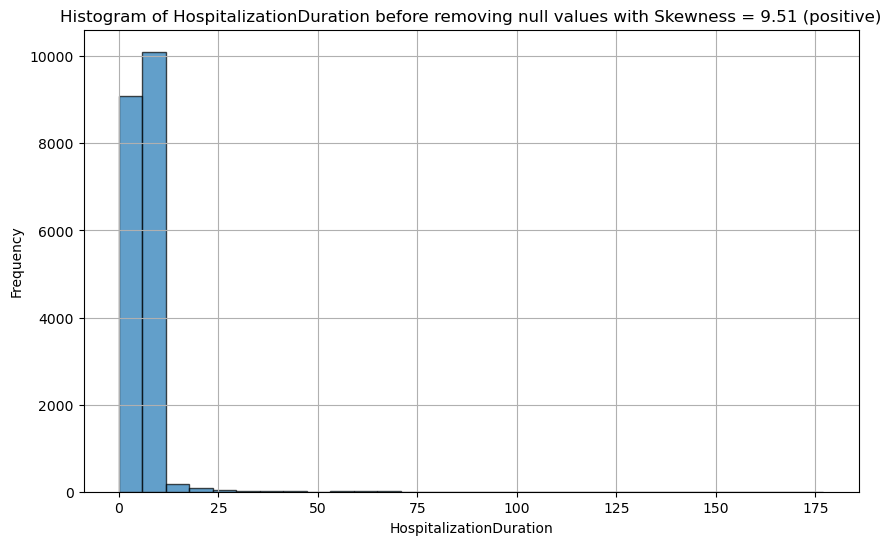

In [16]:
import pandas as pd
from scipy.stats import skew
import matplotlib.pyplot as plt


attribute_name = 'HospitalizationDuration'
attribute_skewness = skew(data[attribute_name].dropna())
print(f'Skewness of the attribute: {attribute_skewness}')

if attribute_skewness > 0:
    skewness_type = 'positive'
elif attribute_skewness < 0:
    skewness_type = 'negative'
else:
    skewness_type = 'zero (symmetric)'

print(f'The skewness is {skewness_type}.')
plt.figure(figsize=(10, 6))
plt.hist(data[attribute_name].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.title(f'Histogram of {attribute_name} before removing null values with Skewness = {attribute_skewness:.2f} ({skewness_type})')
plt.xlabel(attribute_name)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Code to replace null values with mean

In [17]:
import pandas as pd

attribute_name = 'HospitalizationDuration'

value_to_replace = '1'

mean_value = data[data[attribute_name] != value_to_replace][attribute_name].mean()

data.loc[data[attribute_name] == value_to_replace, attribute_name] = mean_value
print(data[attribute_name])

0        3.0
1        5.0
2        3.0
3        3.0
4        3.0
        ... 
19572    8.0
19573    9.0
19574    5.0
19575    8.0
19576    8.0
Name: HospitalizationDuration, Length: 19577, dtype: float64


# Skewness after removing NULL values

Skewness of the attribute: 9.50757938256993
The skewness is positive.


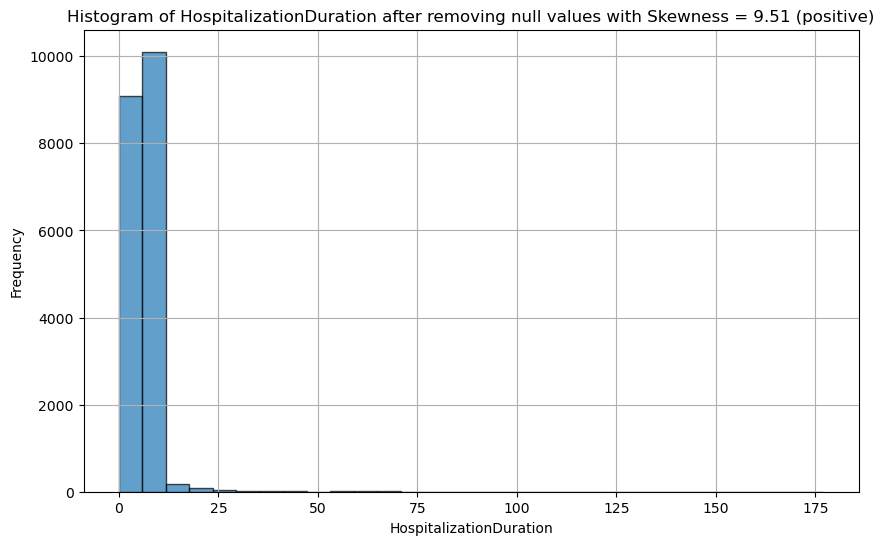

In [18]:
import pandas as pd
from scipy.stats import skew
import matplotlib.pyplot as plt


attribute_name = 'HospitalizationDuration'
attribute_skewness = skew(data[attribute_name].dropna())
print(f'Skewness of the attribute: {attribute_skewness}')

if attribute_skewness > 0:
    skewness_type = 'positive'
elif attribute_skewness < 0:
    skewness_type = 'negative'
else:
    skewness_type = 'zero (symmetric)'

print(f'The skewness is {skewness_type}.')
plt.figure(figsize=(10, 6))
plt.hist(data[attribute_name].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.title(f'Histogram of {attribute_name} after removing null values with Skewness = {attribute_skewness:.2f} ({skewness_type})')
plt.xlabel(attribute_name)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [19]:
data.to_csv(r"D:\Python for data science\influenza dataset.csv", index=False)


In [20]:
data = pd.read_csv(r"D:\Python for data science\influenza dataset.csv")

In [21]:
data

,CollectorInstitution,HostIdentifier,SampleIdentifier,CollectionYear,CollectionSeason,Country,State_Province,City_Local,SubjectAge,Gender,VaccinationStatus,Fever,Symptoms,MedicalConditions,Diagnosis,FluTestStatus,SampleType,DiseaseOutcome,HospitalizationDuration
0,Johns Hopkins University-CEIRS2,02-13-T-0713,"02-13-T-0713,",1,2,1,Maryland,1,15.0,0,1,1,"diarrhea(Not Provided), myalgia(Not Provided),...","OTH-none,",1,1,"Nasal swab,",1,3.0
1,Johns Hopkins University-CEIRS2,02-23-T-0003,"02-23-T-0003,",1,3,2,Not Collected,1,12.0,0,1,1,"diarrhea(N), myalgia(N), conjunctivitis(N), lo...","OTH-none,",1,1,"Nasal swab,",1,5.0
2,Harvard Medical School,NIGSP_YGA_01068,"NIGSP_YGA_01068,",2,1,3,Massachusetts,2,10.0,1,2,2,",",",",1,1,"NW,",2,3.0
3,Harvard Medical School,NIGSP_YGA_01164,"NIGSP_YGA_01164,",3,1,3,Massachusetts,2,29.0,0,2,2,",",",",1,1,"NW,",2,3.0
4,Johns Hopkins University-CEIRS2,02-13-T-0608,"02-13-T-0608,",1,4,1,Maryland,1,40.0,0,1,1,"diarrhea(N), myalgia(N), conjunctivitis(N), lo...","OTH-none,",1,1,"Nasal swab,",1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19572,"University of Tennessee Medical Center, Memphi...",F5027C21,"470920F,470920D,470920A,470920,470920E,470920B...",10,1,3,Tennessee,1,NaN,1,1,6,"diarrhea(U), cough(U), running nose(U), myalgi...",",,,,,,,,",1,0,"Nasal,Nasal,Nasal,Nasal,Nasal,Nasal,Nasal,Nasal,",4,8.0
19573,"University of Tennessee Medical Center, Memphi...",F5023C21,"470916F,470916,470916G,470916H,470916E,470916B...",10,1,3,Tennessee,1,NaN,1,1,6,"diarrhea(U), cough(U), running nose(U), myalgi...",",,,,,,,,,",1,0,"Nasal,Nasal,Nasal,Nasal,Nasal,Nasal,Nasal,Nasa...",4,9.0
19574,"University of Tennessee Medical Center, Memphi...",F5032C31,"473527H,473527B,473527D,473527C,473527E,473527...",10,1,3,Tennessee,1,NaN,0,1,6,"diarrhea(U), cough(U), running nose(U), myalgi...",",,,,,,,,,",1,1,"Nasal,Nasal,Nasal,Nasal,Nasal,Nasal,Nasal,Nasa...",4,5.0
19575,"University of Tennessee Medical Center, Memphi...",F5033C31,"473528B,473528H,473528,473528D,473528A,473528F...",10,1,3,Tennessee,1,NaN,1,1,6,"diarrhea(U), cough(U), running nose(U), myalgi...",",,,,,,,,,",1,0,"Nasal,Nasal,Nasal,Nasal,Nasal,Nasal,Nasal,Nasa...",4,8.0


# BOXPLOT & SCATTER PLOT:

# 1. SubjectAge

In [22]:

minimum_value = data['SubjectAge'].min()
maximum_value = data['SubjectAge'].max()

print("Minimum value:", minimum_value)
print("Maximum value:", maximum_value)


Minimum value: 0.0
Maximum value: 50.0


In [23]:
data['SubjectAge'].mean()

1.176458440887971

In [24]:
data['SubjectAge'].median()

1.0

In [25]:
data['SubjectAge'].mode()

0    1.0
Name: SubjectAge, dtype: float64

In [26]:
Q1 =  data["SubjectAge"].quantile(0.25)
Q1

0.0

In [27]:
Q3 =  data["SubjectAge"].quantile(0.75)
Q3

1.0

In [28]:
IQR = Q3 - Q1
IQR

1.0

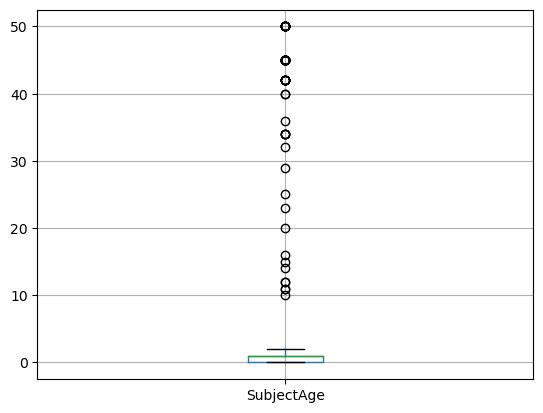

In [29]:
import matplotlib.pyplot as plt
data.boxplot(column ="SubjectAge")
plt.show()

# Handling outliers

In [30]:
Lower_Boundary= 0.0-1.5*IQR
Upper_Boundary= 1.0+1.5*IQR
print(Lower_Boundary)
print(Upper_Boundary)

-1.5
2.5


In [31]:
data_filtered=data[(data['SubjectAge']>=Lower_Boundary) & (data['SubjectAge']<=Upper_Boundary)]

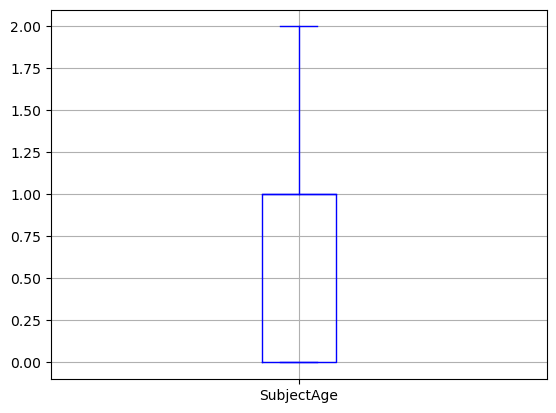

In [32]:
import matplotlib.pyplot as plt
data_filtered.boxplot(column ="SubjectAge",color='blue')
plt.show()

# 2. Gender


In [33]:

minimum_value = data['Gender'].min()
maximum_value = data['Gender'].max()

print("Minimum value:", minimum_value)
print("Maximum value:", maximum_value)


Minimum value: 0
Maximum value: 3


In [34]:
data['Gender'].mean()

0.48209633753894876

In [35]:
data['Gender'].median()

0.0

In [36]:
data['Gender'].mode()

0    0
Name: Gender, dtype: int64

In [37]:
Q1 =  data["Gender"].quantile(0.25)
Q1

0.0

In [38]:
Q3 =  data["Gender"].quantile(0.75)
Q3

1.0

In [39]:
IQR=Q3-Q1
IQR

1.0

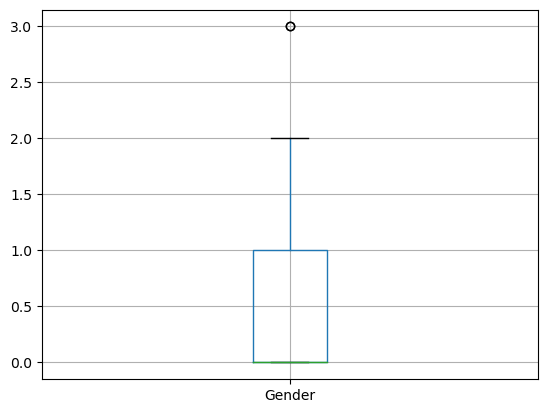

In [40]:
import matplotlib.pyplot as plt
data.boxplot(column="Gender")
plt.show()

In [41]:
Lower_Boundary: 0.0-1.5*IQR
Upper_Boundary: 1.0+1.5*IQR
print(Lower_Boundary)
print(Upper_Boundary)


-1.5
2.5


In [42]:
data_filtered=data[(data['Gender']>=Lower_Boundary) & (data['Gender']<=Upper_Boundary)]

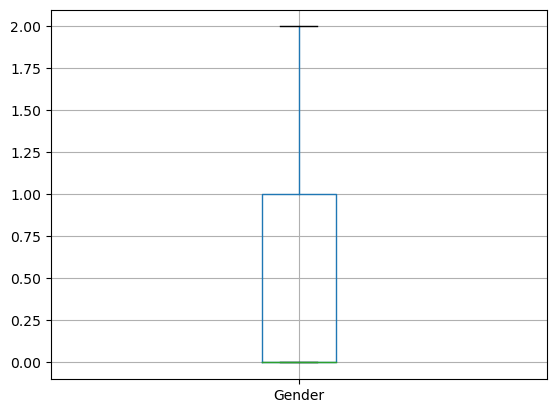

In [43]:
import matplotlib.pyplot as plt
data_filtered.boxplot(column="Gender")
plt.show()

# 3. HospitalizationDuration

In [44]:

minimum_value = data['HospitalizationDuration'].min()
maximum_value = data['HospitalizationDuration'].max()

print("Minimum value:", minimum_value)
print("Maximum value:", maximum_value)


Minimum value: 0.0
Maximum value: 177.0


In [45]:
data['HospitalizationDuration'].mean()

5.831792409460081

In [46]:
data['HospitalizationDuration'].median()

6.0

In [47]:
data['HospitalizationDuration'].mode()

0    7.0
Name: HospitalizationDuration, dtype: float64

In [48]:
Q1 =  data["HospitalizationDuration"].quantile(0.25)
Q1

3.0

In [49]:
Q3 =  data["HospitalizationDuration"].quantile(0.75)
Q3

7.0

In [50]:
IQR=Q3-Q1
IQR

4.0

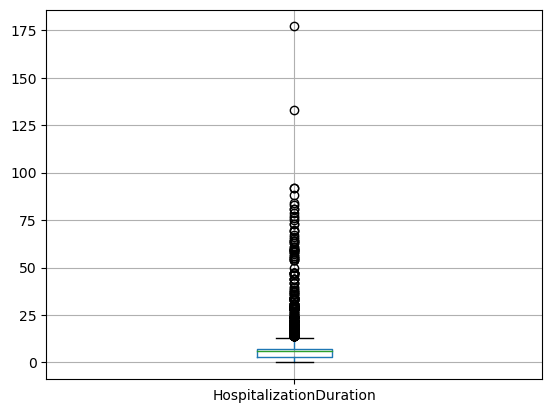

In [51]:
import matplotlib.pyplot as plt
data.boxplot(column="HospitalizationDuration")
plt.show()

In [52]:
Lower_Boundary=3.0-1.5*4.0
Upper_Boundary=7.0+1.5*4.0
print(Lower_Boundary)
print(Upper_Boundary)

-3.0
13.0


In [53]:
data_filtered=data[(data['HospitalizationDuration']>=Lower_Boundary) & (data['HospitalizationDuration']<=Upper_Boundary)]

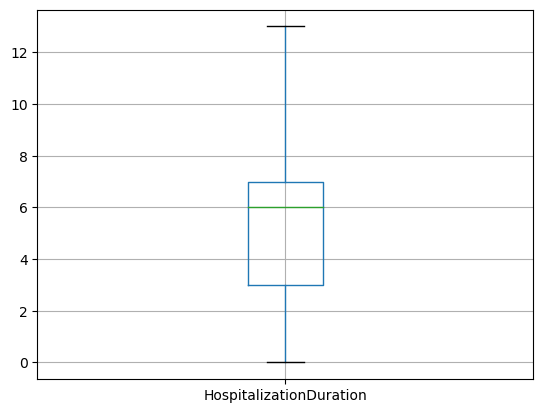

In [54]:
import matplotlib.pyplot as plt
data_filtered.boxplot(column="HospitalizationDuration")
plt.show()

# 4. VaccinationStatus

In [55]:

minimum_value = data['VaccinationStatus'].min()
maximum_value = data['VaccinationStatus'].max()

print("Minimum value:", minimum_value)
print("Maximum value:", maximum_value)


Minimum value: 1
Maximum value: 8


In [56]:
data['VaccinationStatus'].mean()

1.1412371660622158

In [57]:
data['VaccinationStatus'].median()

1.0

In [58]:
data['VaccinationStatus'].mode()

0    1
Name: VaccinationStatus, dtype: int64

In [59]:
Q1 =  data["VaccinationStatus"].quantile(0.25)
Q1

1.0

In [60]:
Q3 =  data["VaccinationStatus"].quantile(0.75)
Q3

1.0

In [61]:
IQR=Q3-Q1
IQR

0.0

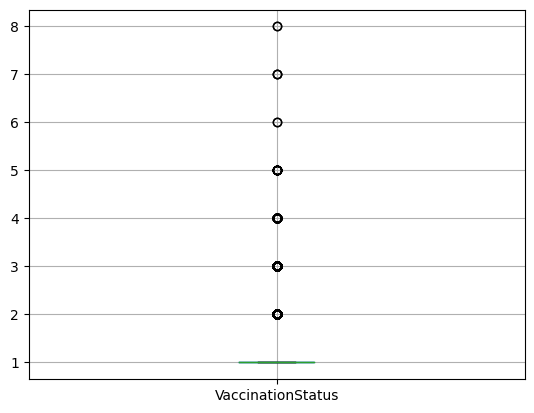

In [62]:
import matplotlib.pyplot as plt
data.boxplot(column='VaccinationStatus')
plt.show()

In [63]:
Lower_Boundary=1.0-1.5*0.0
Upper_Boundary=1.0+1.5*0.0
print(Lower_Boundary)
print(Upper_Boundary)

1.0
1.0


In [64]:
data_filtered=data[(data['VaccinationStatus']>=Lower_Boundary) & (data['VaccinationStatus']<=Upper_Boundary)]

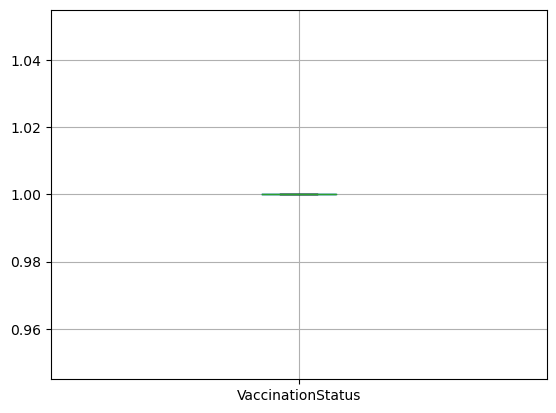

In [65]:
import matplotlib.pyplot as plt
data_filtered.boxplot(column='VaccinationStatus')
plt.show()

# 5. Fever

In [66]:

minimum_value = data['Fever'].min()
maximum_value = data['Fever'].max()

print("Minimum value:", minimum_value)
print("Maximum value:", maximum_value)


Minimum value: 1
Maximum value: 17


In [67]:
data['Fever'].mean()

3.5705164223323287

In [68]:
data['Fever'].median()

2.0

In [69]:
data['Fever'].mode()

0    1
Name: Fever, dtype: int64

In [70]:
Q1 =  data["Fever"].quantile(0.25)
Q1

1.0

In [71]:
Q3 =  data["Fever"].quantile(0.75)
Q3

6.0

In [72]:
IQR=Q3-Q1
IQR

5.0

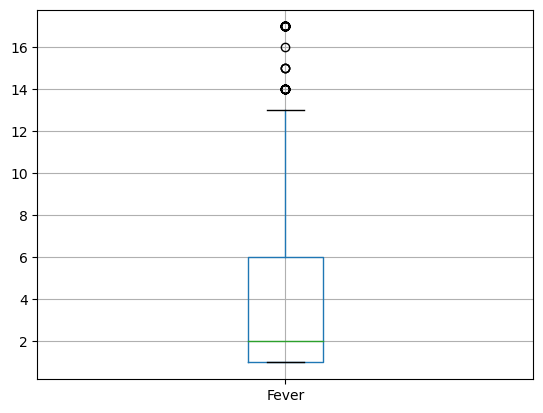

In [73]:
import matplotlib.pyplot as plt
data.boxplot(column='Fever')
plt.show()

In [74]:
Lower_Boundary=1.0-1.5*5.0
Upper_Boundary=6.0+1.5*5.0
print(Lower_Boundary)
print(Upper_Boundary)

-6.5
13.5


In [75]:
data_filtered=data[(data['Fever']>=Lower_Boundary) & (data['Fever']<=Upper_Boundary)]

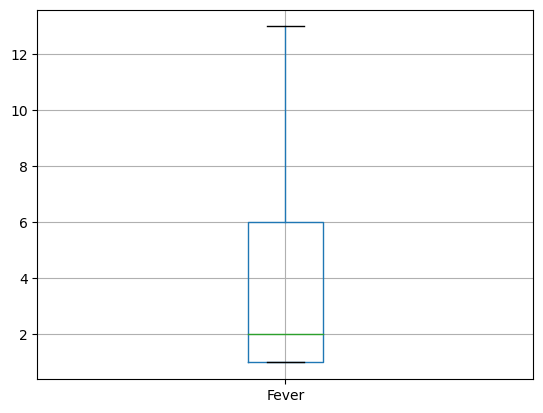

In [76]:
import matplotlib.pyplot as plt
data_filtered.boxplot(column='Fever')
plt.show()

# 6. Diagnosis

In [77]:

minimum_value = data['Diagnosis'].min()
maximum_value = data['Diagnosis'].max()

print("Minimum value:", minimum_value)
print("Maximum value:", maximum_value)


Minimum value: 1
Maximum value: 42


In [78]:
data['Diagnosis'].mean()

1.1663686979618941

In [79]:
data['Diagnosis'].median()

1.0

In [80]:
data['Diagnosis'].mode()

0    1
Name: Diagnosis, dtype: int64

In [81]:
Q1 =  data["Diagnosis"].quantile(0.25)
Q1

1.0

In [82]:
Q3 =  data["Diagnosis"].quantile(0.75)
Q3

1.0

In [83]:
IQR=Q3-Q1
IQR

0.0

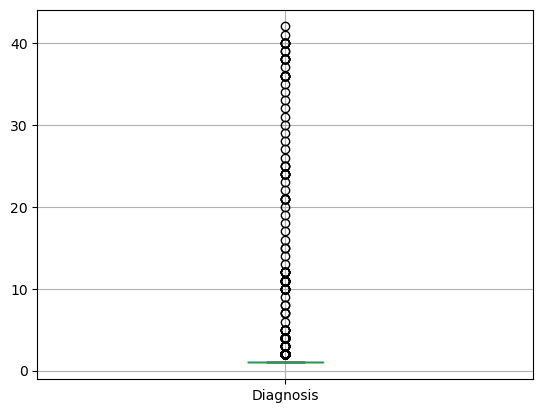

In [84]:
import matplotlib.pyplot as plt
data.boxplot(column='Diagnosis')
plt.show()

In [85]:
Lower_Boundary=1.0-1.5*0.0
Upper_Boundary=1.0+1.5*0.0
print(Lower_Boundary)
print(Upper_Boundary)

1.0
1.0


In [86]:
data_filtered=data[(data['Diagnosis']>=Lower_Boundary) & (data['Diagnosis']<=Upper_Boundary)]

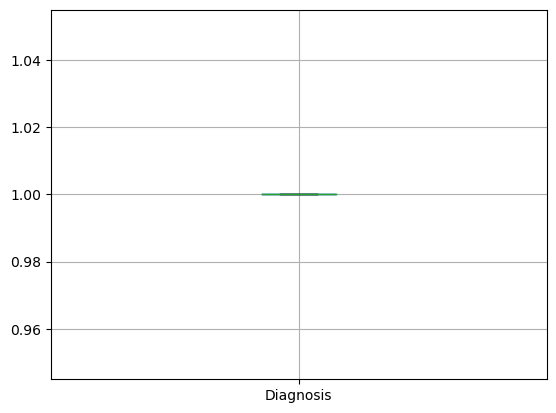

In [87]:
import matplotlib.pyplot as plt
data_filtered.boxplot(column='Diagnosis')
plt.show()

# 7. DiseaseOutcome

In [88]:

minimum_value = data['DiseaseOutcome'].min()
maximum_value = data['DiseaseOutcome'].max()

print("Minimum value:", minimum_value)
print("Maximum value:", maximum_value)


Minimum value: 1
Maximum value: 9


In [89]:
data['DiseaseOutcome'].mean()

2.7905705675026815

In [90]:
data['DiseaseOutcome'].median()

4.0

In [91]:
data['DiseaseOutcome'].mode()

0    4
Name: DiseaseOutcome, dtype: int64

In [92]:
Q1 =  data["DiseaseOutcome"].quantile(0.25)
Q1

1.0

In [93]:
Q3 =  data["DiseaseOutcome"].quantile(0.75)
Q3

4.0

In [94]:
IQR=Q3-Q1
IQR

3.0

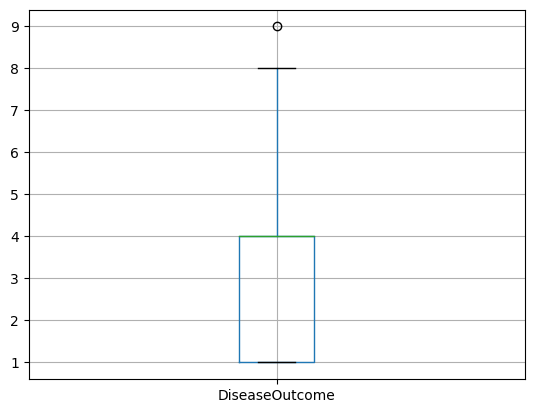

In [95]:
import matplotlib.pyplot as plt
data.boxplot(column='DiseaseOutcome')
plt.show()

In [96]:
Lower_Boundary=1.0-1.5*3.0
Upper_Boundary=4.0+1.5*3.0
print(Lower_Boundary)
print(Upper_Boundary)

-3.5
8.5


In [97]:
data_filtered=data[(data['DiseaseOutcome']>=Lower_Boundary) & (data['DiseaseOutcome']<=Upper_Boundary)]

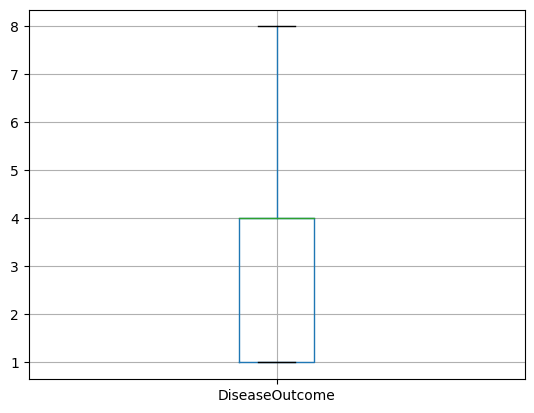

In [98]:
import matplotlib.pyplot as plt
data_filtered.boxplot(column='DiseaseOutcome')
plt.show()

# 8. Country

In [99]:

minimum_value = data['Country'].min()
maximum_value = data['Country'].max()

print("Minimum value:", minimum_value)
print("Maximum value:", maximum_value)


Minimum value: 1
Maximum value: 15


In [100]:
data['Country'].mean()

5.2514174796955615

In [101]:
data['Country'].median()

7.0

In [102]:
data['Country'].mode()

0    7
Name: Country, dtype: int64

In [103]:
Q1 =  data["Country"].quantile(0.25)
Q1

3.0

In [104]:
Q3 =  data["Country"].quantile(0.75)
Q3

7.0

In [105]:
IQR=Q3-Q1
IQR

4.0

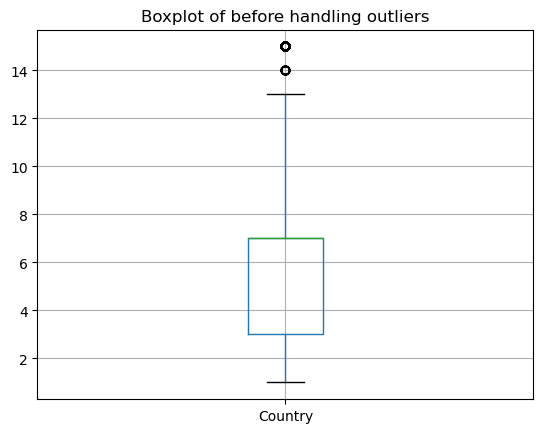

In [106]:
import matplotlib.pyplot as plt
data.boxplot(column='Country')
plt.title('Boxplot of before handling outliers')
plt.show()

In [107]:
Lower_Boundary=3.0-1.5*4.0
Upper_Boundary=7.0+1.5*4.0
print(Lower_Boundary)
print(Upper_Boundary)

-3.0
13.0


In [108]:
data_filtered=data[(data['Country']>=Lower_Boundary) & (data['Country']<=Upper_Boundary)]

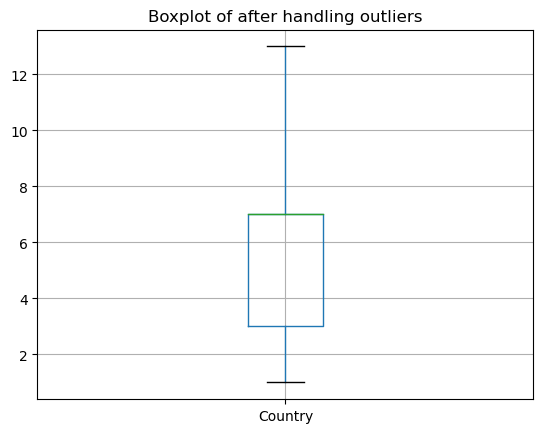

In [109]:
import matplotlib.pyplot as plt
data_filtered.boxplot(column='Country')
plt.title('Boxplot of after handling outliers')
plt.show()

# 9. City_Local

In [110]:
minimum_value = data['City_Local'].min()
maximum_value = data['City_Local'].max()

print("Minimum value:", minimum_value)
print("Maximum value:", maximum_value)

Minimum value: 1
Maximum value: 80


In [111]:
data['City_Local'].mean()

2.7412780303417277

In [112]:
data['City_Local'].median()

1.0

In [113]:
data['City_Local'].mode()

0    1
Name: City_Local, dtype: int64

In [114]:
Q1 =  data["City_Local"].quantile(0.25)
Q1

1.0

In [115]:
Q3 =  data["City_Local"].quantile(0.75)
Q3

1.0

In [116]:
IQR=Q3-Q1
IQR

0.0

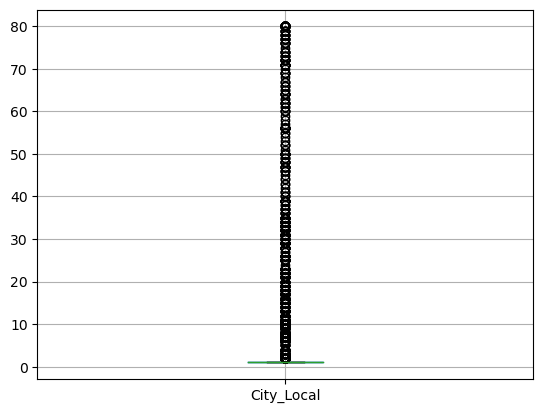

In [117]:
import matplotlib.pyplot as plt
data.boxplot(column='City_Local')
plt.show()

In [118]:
Lower_Boundary=1.0-1.5*0.0
Upper_Boundary=1.0+1.5*0.0
print(Lower_Boundary)
print(Upper_Boundary)

1.0
1.0


In [119]:
data_filtered=data[(data['City_Local']>=Lower_Boundary) & (data['City_Local']<=Upper_Boundary)]

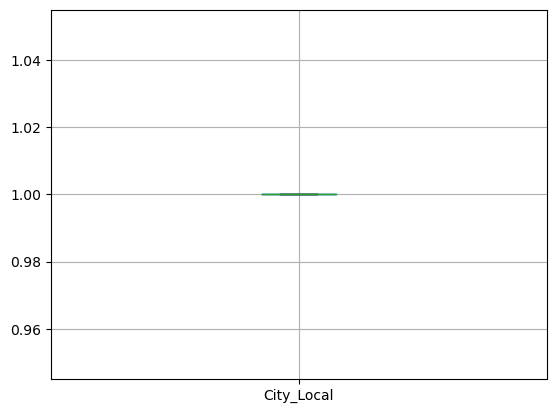

In [120]:
import matplotlib.pyplot as plt
data_filtered.boxplot(column='City_Local')
plt.show()

# 10. CollectionSeason

In [121]:

minimum_value = data['CollectionSeason'].min()
maximum_value = data['CollectionSeason'].max()

print("Minimum value:", minimum_value)
print("Maximum value:", maximum_value)


Minimum value: 1
Maximum value: 13


In [122]:
data['CollectionSeason'].mean()

2.2370639015170863

In [123]:
data['CollectionSeason'].median()

1.0

In [124]:
data['CollectionSeason'].mode()

0    1
Name: CollectionSeason, dtype: int64

In [125]:
Q1 =  data["CollectionSeason"].quantile(0.25)
Q1

1.0

In [126]:
Q3 =  data["CollectionSeason"].quantile(0.75)
Q3

3.0

In [127]:
IQR=Q3-Q1
IQR

2.0

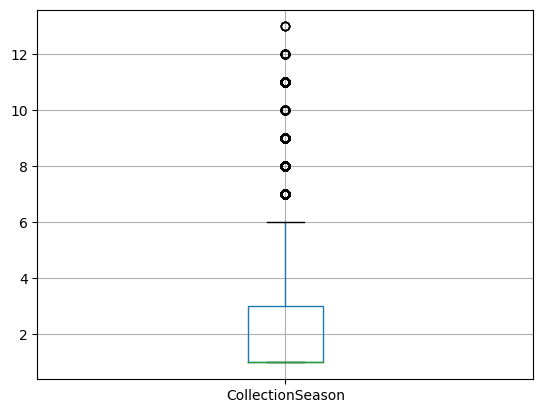

In [128]:
import matplotlib.pyplot as plt

data.boxplot(column="CollectionSeason")
plt.show()

In [129]:
Lower_Boundary=1.0-1.5*2.0
Upper_Boundary=3.0+1.5*2.0
print(Lower_Boundary)
print(Upper_Boundary)

-2.0
6.0


In [130]:
data_filtered=data[(data['CollectionSeason']>=Lower_Boundary) & (data['CollectionSeason']<=Upper_Boundary)]

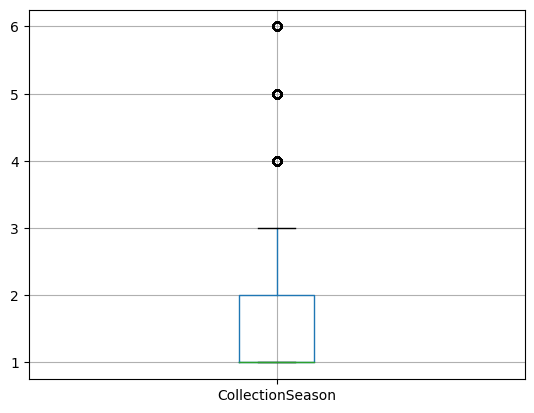

In [131]:
import matplotlib.pyplot as plt

data_filtered.boxplot(column="CollectionSeason")
plt.show()

# 11. CollectionYear

In [132]:

minimum_value = data['Gender'].min()
maximum_value = data['Gender'].max()

print("Minimum value:", minimum_value)
print("Maximum value:", maximum_value)


Minimum value: 0
Maximum value: 3


In [133]:
data['CollectionYear'].mean()

5.378454308627471

In [134]:
data['CollectionYear'].median()

4.0

In [135]:
data['CollectionYear'].mode()

0    1
Name: CollectionYear, dtype: int64

In [136]:
Q1 =  data["CollectionYear"].quantile(0.25)
Q1

2.0

In [137]:
Q3 =  data["CollectionYear"].quantile(0.75)
Q3

9.0

In [138]:
IQR=Q3-Q1
IQR

7.0

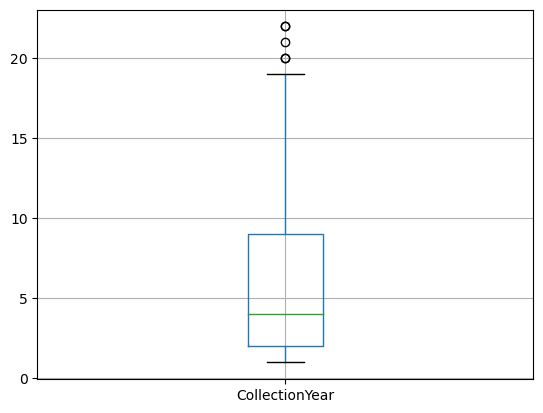

In [139]:
import matplotlib.pyplot as plt

data.boxplot(column="CollectionYear")
plt.show()

In [140]:
Lower_Boundary=2.0-1.5*7.0
Upper_Boundary=9.0+1.5*7.0
print(Lower_Boundary)
print(Upper_Boundary)

-8.5
19.5


In [141]:
data_filtered=data[(data['CollectionYear']>=Lower_Boundary) & (data['CollectionYear']<=Upper_Boundary)]

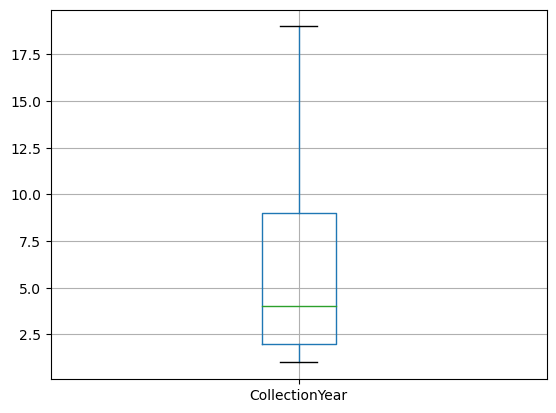

In [142]:
import matplotlib.pyplot as plt

data_filtered.boxplot(column="CollectionYear")
plt.show()

# 12. FluTestStatus

In [143]:
minimum_value = data['FluTestStatus'].min()
maximum_value = data['FluTestStatus'].max()

print("Minimum value:", minimum_value)
print("Maximum value:", maximum_value)


Minimum value: 0
Maximum value: 1


In [144]:
data['FluTestStatus'].mean()

0.4011339837564489

In [145]:
data['FluTestStatus'].median()

0.0

In [146]:
data['FluTestStatus'].mode()

0    0
Name: FluTestStatus, dtype: int64

In [147]:
Q1 =  data["FluTestStatus"].quantile(0.25)
Q1

0.0

In [148]:
Q3 =  data["FluTestStatus"].quantile(0.75)
Q3

1.0

In [149]:
IQR=Q3-Q1
IQR

1.0

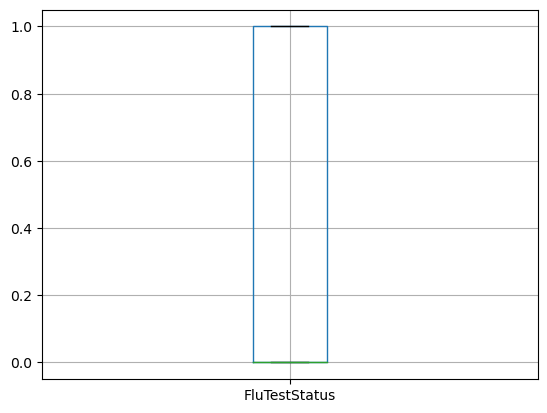

In [150]:
import matplotlib.pyplot as plt

data.boxplot(column="FluTestStatus")
plt.show()

In [151]:
Lower_Boundary=0.0-1.5*1.0
Upper_Boundary=1.0+1.5*1.0
print(Lower_Boundary)
print(Upper_Boundary)

-1.5
2.5


In [152]:
data_filtered=data[(data['CollectionYear']>=Lower_Boundary) & (data['CollectionYear']<=Upper_Boundary)]

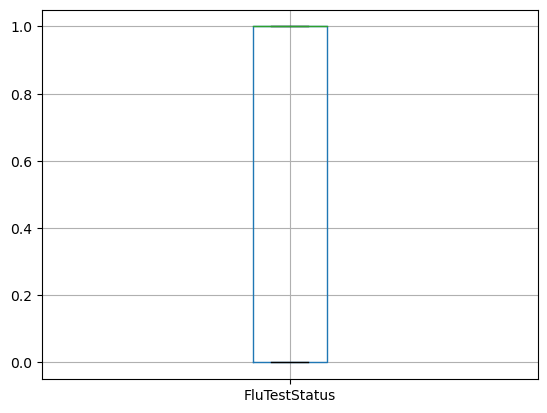

In [153]:
import matplotlib.pyplot as plt

data_filtered.boxplot(column="FluTestStatus")
plt.show()

# Univariate Analysis
- Univariate analysis involves examining each variable individually to understand its distribution, central tendency, and dispersion.

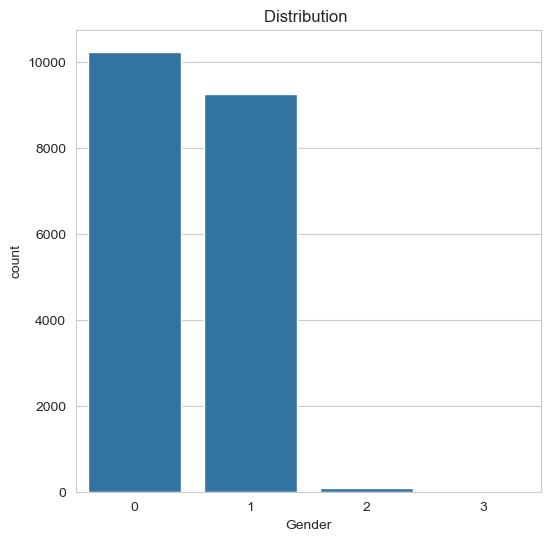

In [154]:

sns.set_style("whitegrid")

plt.figure(figsize=(6, 6))
sns.countplot(x=data['Gender'])
plt.title('Distribution ')
plt.show()

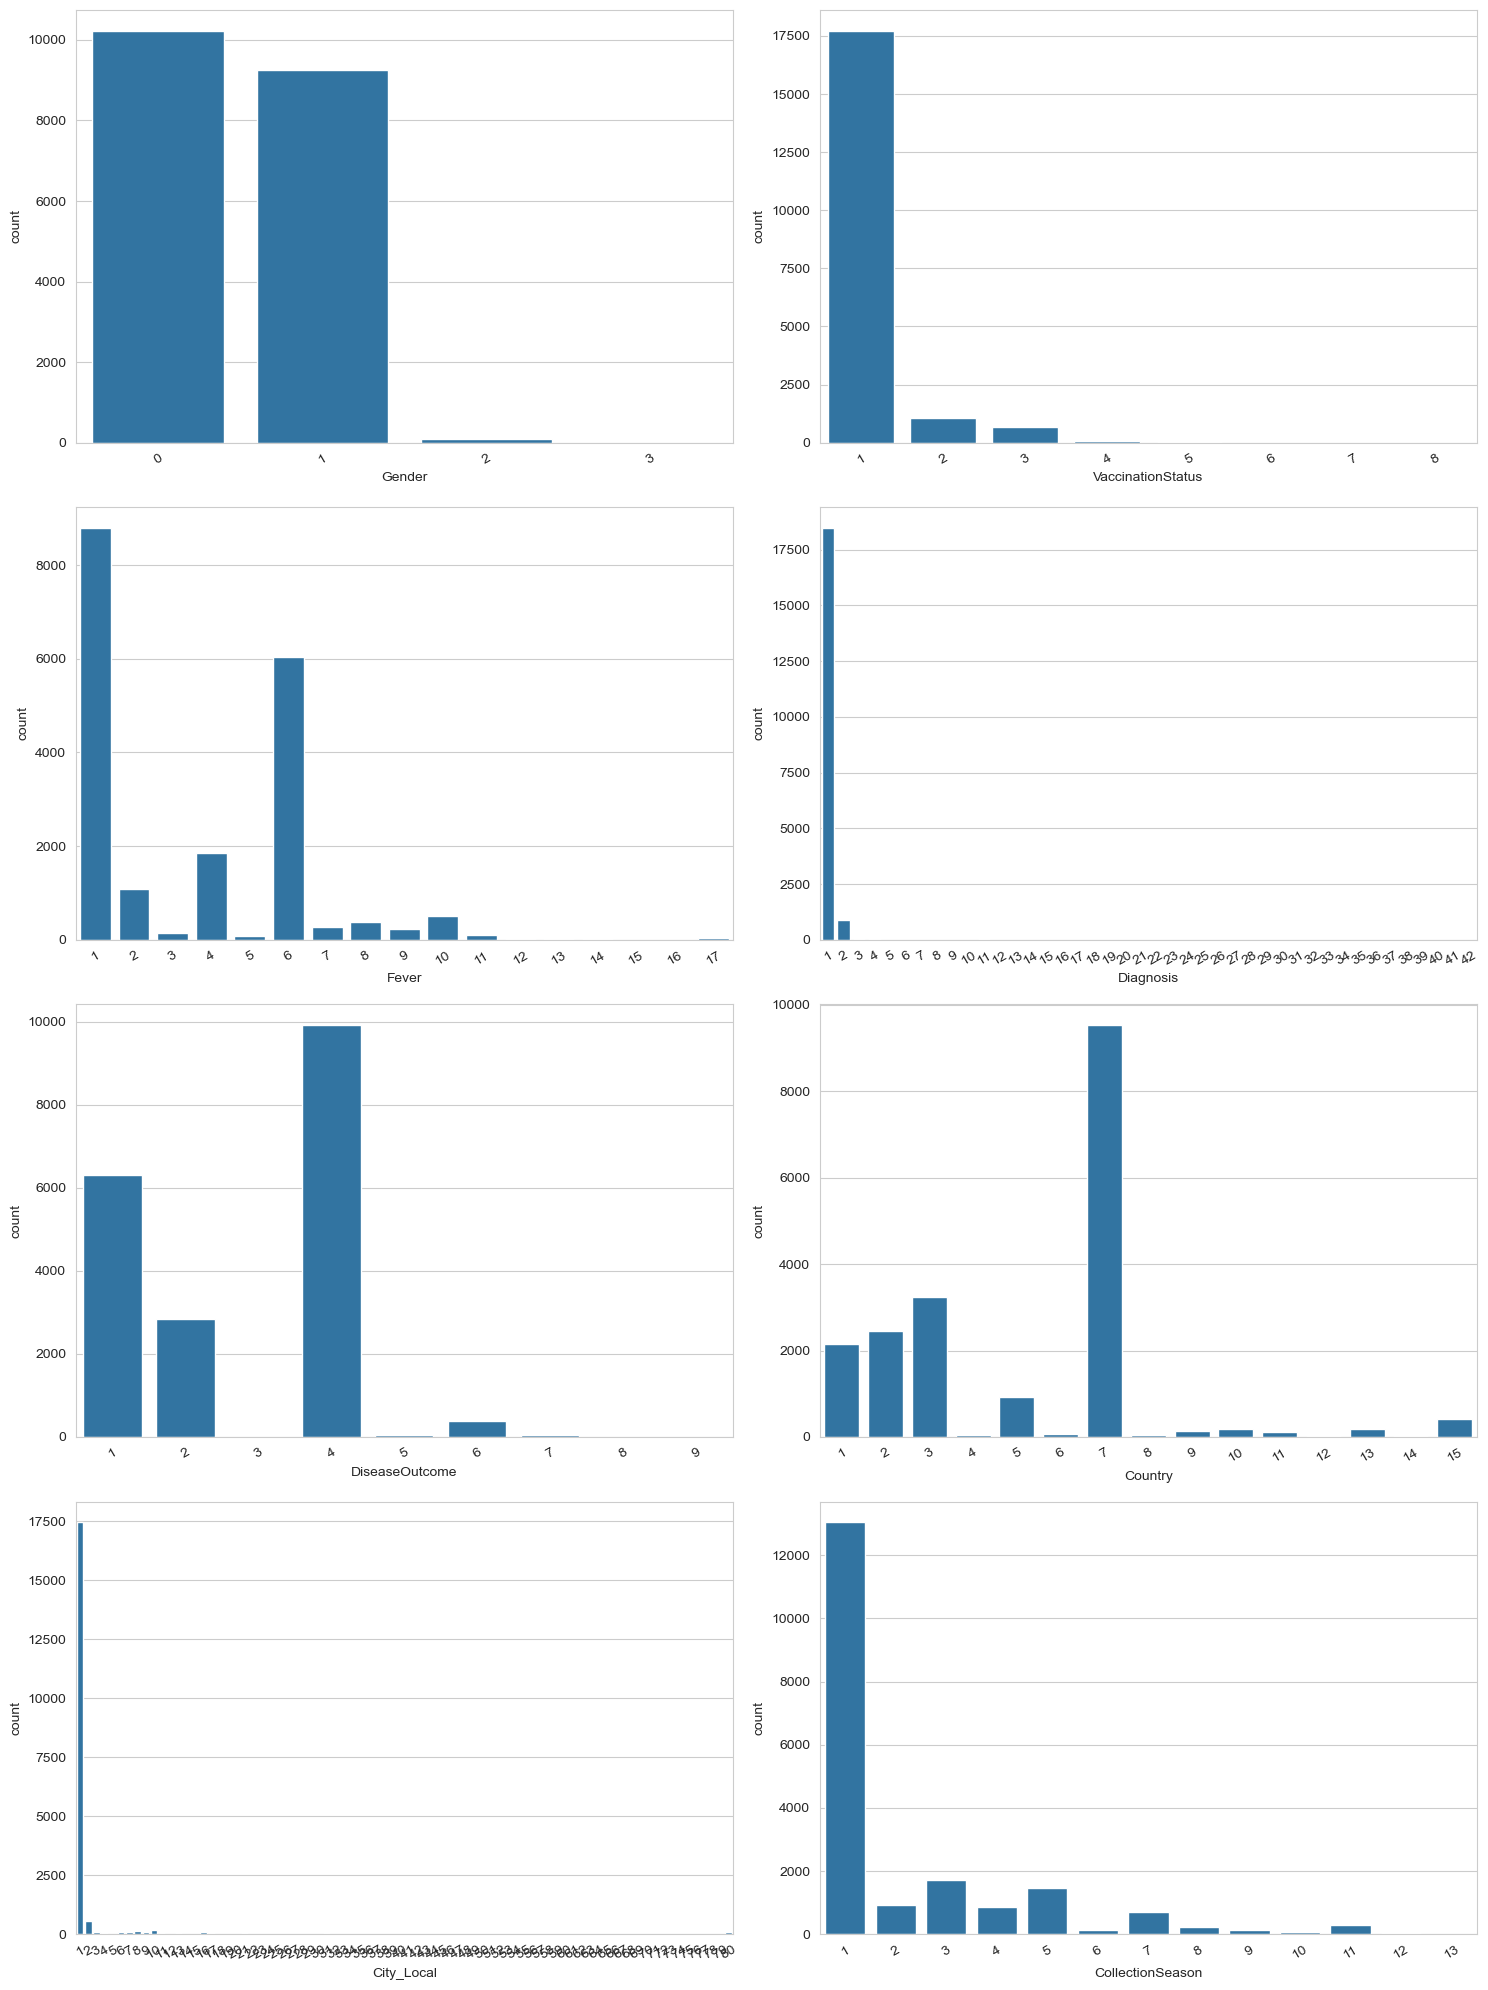

In [155]:

categorical_variables = ['Gender','VaccinationStatus','Fever','Diagnosis','DiseaseOutcome','Country','City_Local','CollectionSeason','CollectionYear']

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

for var, subplot in zip(categorical_variables, axs.flatten()):
    sns.countplot(x=var, data=data, ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(30)

plt.tight_layout()
plt.show()

# Bivariate Analysis
- Bivariate analysis involves examining the relationship between two variables.

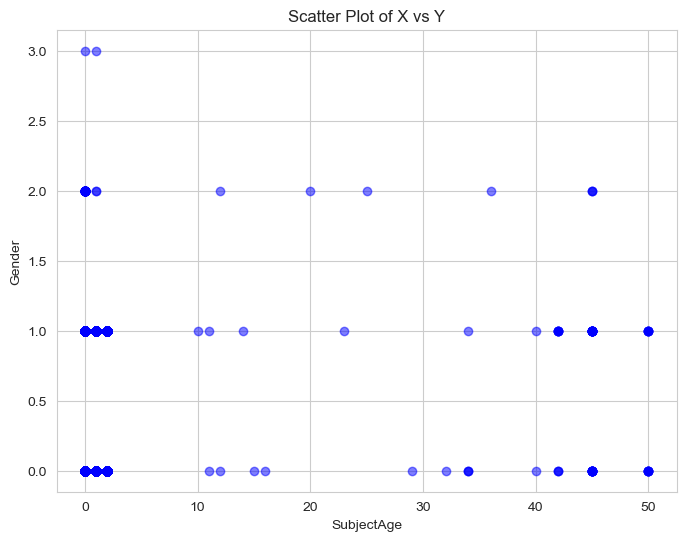

In [156]:

x = data['SubjectAge']
y = data['Gender']

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', alpha=0.5) 
plt.title('Scatter Plot of X vs Y')
plt.xlabel('SubjectAge')
plt.ylabel('Gender')
plt.grid(True)
plt.show()

# Multivariate Analysis
- Multivariate analysis involves examining more than two variables simultaneously to understand the complex relationships between them.

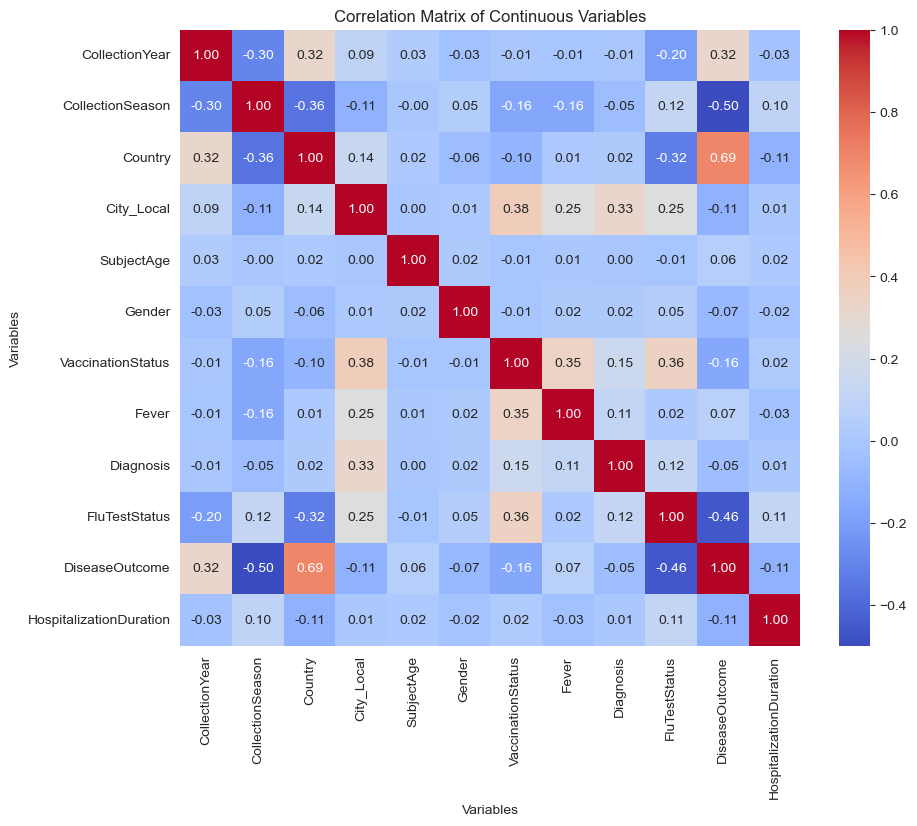

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


continuous_data = data.select_dtypes(include=['float64', 'int64'])

correlation_matrix = continuous_data.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Continuous Variables')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()

# HYPOTHESIS

# Hypothesis 1 : The duration of hospitalization is correlated with the patient's age.

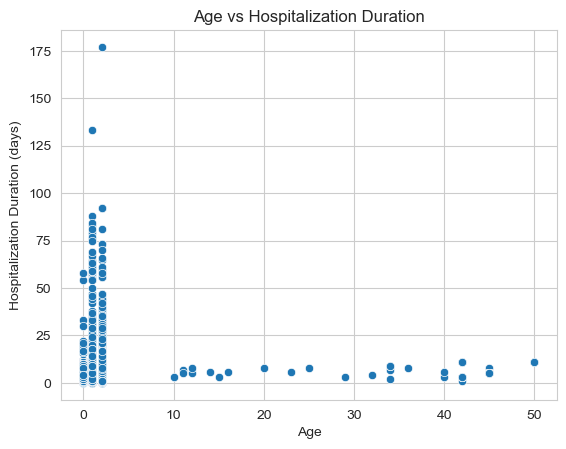

In [158]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


data['SubjectAge'] = pd.to_numeric(data['SubjectAge'], errors='coerce')
data['HospitalizationDuration'] = pd.to_numeric(data['HospitalizationDuration'], errors='coerce')

sns.scatterplot(x='SubjectAge', y='HospitalizationDuration', data=data)
plt.title('Age vs Hospitalization Duration')
plt.xlabel('Age')
plt.ylabel('Hospitalization Duration (days)')
plt.show()




This hypothesis tests that a patient's age is correlated with their duration of hospitalization. It converts the relevant columns to numeric types, creates a scatter plot to visualize the relationship, and calculates the Pearson correlation coefficient to quantify the strength and significance of the correlation.

The correlation between SubjectAge and HospitalizationDuration is positive and strong with 0.02.

# Hypothesis 2 : How patients with fever affects fluteststatus?

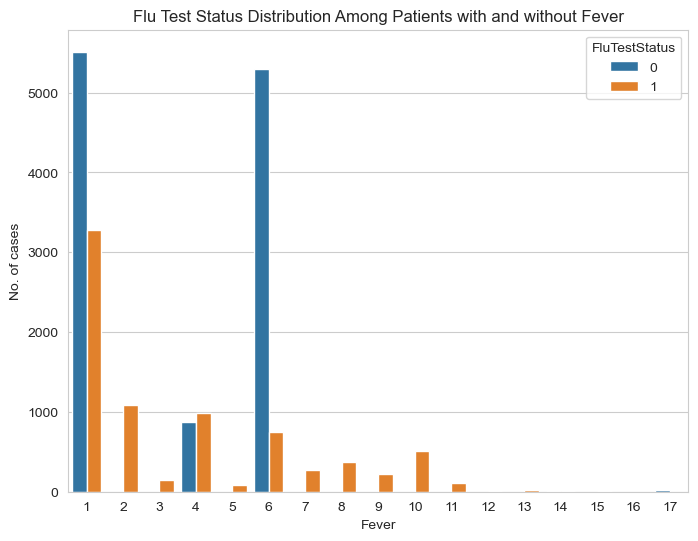

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='Fever', hue='FluTestStatus', data=data)
plt.title('Flu Test Status Distribution Among Patients with and without Fever')
plt.xlabel('Fever')
plt.ylabel('No. of cases')
plt.legend(title='FluTestStatus')
plt.show()



This code tests the hypothesis that having a fever is associated with a positive flu test result. It converts the 'Fever' and 'FluTestStatus' columns to binary values, creates a bar plot to visualize the relationship, and uses the chi-square test to statistically assess the association between fever and flu test results, reporting the chi-square statistic and p-value.

The correlation between FluTestStatus and Fever is positive with 0.02.

# Hypothesis 3 : There is a difference in disease outcome based on country.

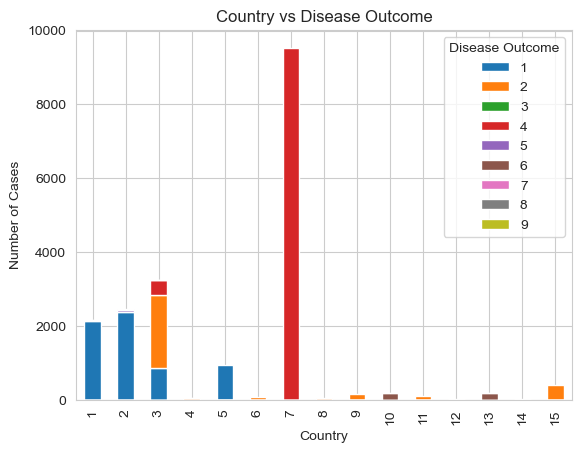

Chi-square test for Country and Disease Outcome: chi2=53771.18391512722, p-value=0.0


In [160]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency


gender_vs_outcome = pd.crosstab(data['Country'], data['DiseaseOutcome'])


gender_vs_outcome.plot(kind='bar', stacked=True)
plt.title('Country vs Disease Outcome')
plt.xlabel('Country')
plt.ylabel('Number of Cases')
plt.legend(title='Disease Outcome')
plt.show()

chi2, p, dof, ex = chi2_contingency(gender_vs_outcome)
print(f'Chi-square test for Country and Disease Outcome: chi2={chi2}, p-value={p}')


This code first creates a contingency table (cross-tabulation) showing the frequency of different disease outcomes for each country using the `Country` and `DiseaseOutcome` columns from the dataset. It then visualizes this relationship in a stacked bar chart and performs a Chi-square test to determine if there is a statistically significant association between the country and the disease outcome, printing the test's Chi-square statistic and p-value.

The correlation between DiseaseOutcome and Country is positive and strong with 0.69.

# Hypothesis 4 : VaccinationStatus and Country Affect Flu Test Status


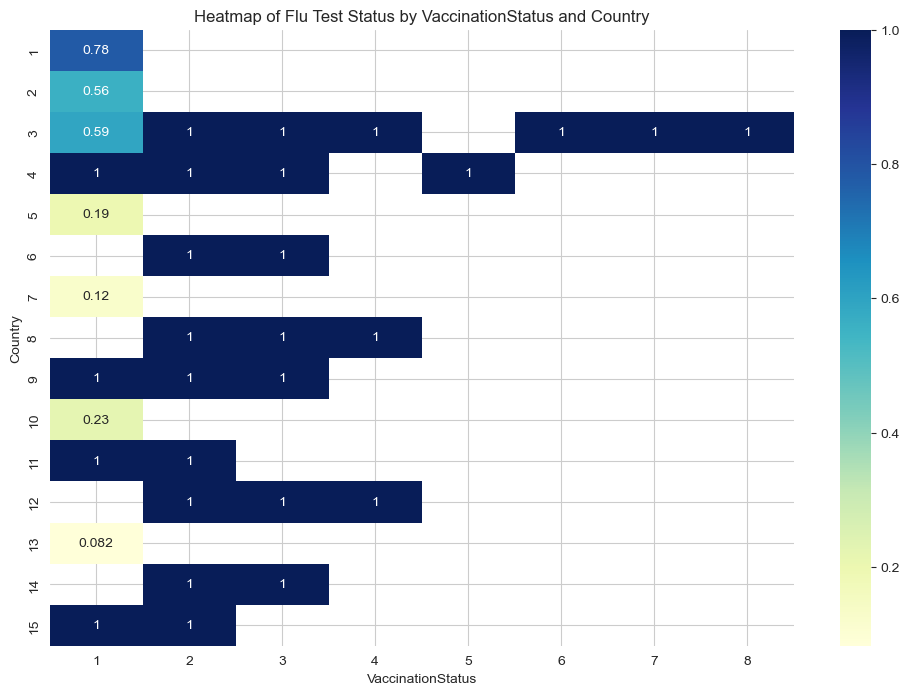

In [161]:

data = pd.read_csv(r"D:\Python for data science\influenza ds.csv")

pivot_table = data.pivot_table(index='Country', columns='VaccinationStatus', values='FluTestStatus', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu')
plt.title('Heatmap of Flu Test Status by VaccinationStatus and Country')
plt.xlabel('VaccinationStatus')
plt.ylabel('Country')
plt.show()


| Column Name         | Original Value                                                     | Replaced Value |
|:---------------------:|:--------------------------------------------------------------------:|:----------------:|
| Country             | United States Of America                                           | 1              |
|                     | Taiwan (Province Of China)                                         | 2              |
|                     | USA                                                                | 3              |
|                     | Mexico                                                             | 4              |
|                     | Taiwan                                                             | 2              |
|                     | Zambia                                                             | 5              |
|                     | Peru                                                               | 15             |
|                     | Australia                                                          | 6              |
|                     | China                                                              | 7              |
|                     | Japan                                                              | 8              |
|                     | Chile                                                              | 9              |
|                     | Colombia                                                           | 10             |
|                     | Nicaragua                                                          | 11             |
|                     | Guam                                                               | 12             |
|                     | Columbia,Colombia                                                  | 13             |
|                     | South Korea                                                        | 14             |
|                     | USA,United States Of America                                       | 3              |
|                     | Cambodia                                                           | 14             |
|                     | Brazil                                                             | 15             |
|                     | Taiwan (Province Of China),Taiwan                                  | 2              |
| VaccinationStatus   | No                                                              | 1              |
|                     | Yes                                                                | 2              |
|                     | N/A                                                                  | 3              |
|                     | UN                                                                 | 4              |
|                     | Not recorded                                                                 | 5              |
|                     | NR                                                                 | 6              |
|                     | EH                                                                 | 7              |
|                     | Y                                                                  | 8              |
| FluTestStatus       | Positive                                                           | 1              |
|                     | Negative                                                           | 0              |


This code creates a pivot table to summarize the mean flu test status by country and vaccination status. It then visualizes this information using a heatmap, where each cell's color represents the average flu test status for the corresponding country and vaccination status, and the actual mean values are annotated on the heatmap. The heatmap helps to visually inspect how flu test status varies across different countries and vaccination statuses.

The correlation between VaccinationStatus and Country is negative with -0.10.
The correlation between VaccinationStatus and FluTestStatus is positive and strong with 0.36.
The correlation between FluTestStatus and Country is negative with -0.32.

# Hypothesis 5: There is a significant difference in hospitalization duration based on Flu Test status.

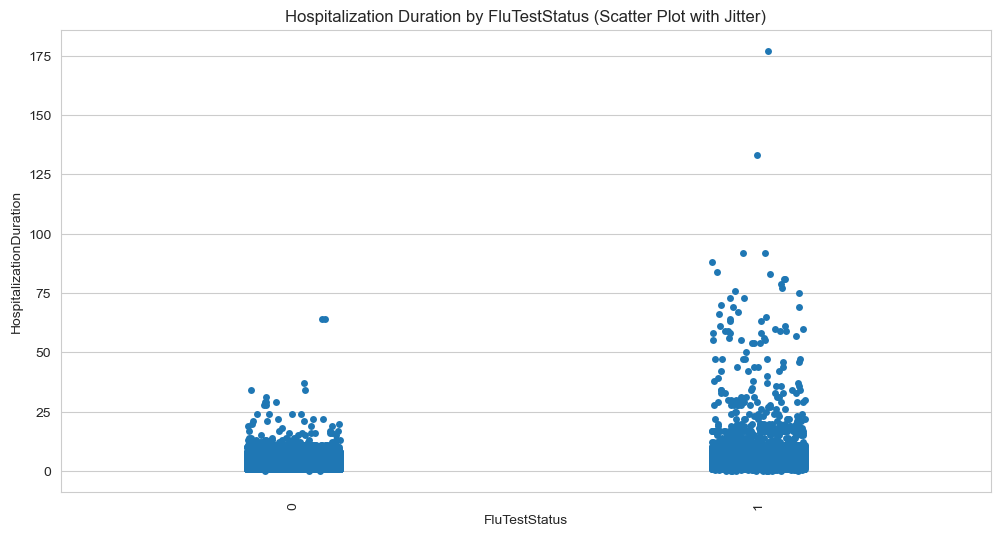

In [162]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


country_data = data[['FluTestStatus', 'HospitalizationDuration']]


country_data = country_data.dropna(subset=['FluTestStatus', 'HospitalizationDuration'])
country_data['HospitalizationDuration'] = pd.to_numeric(country_data['HospitalizationDuration'], errors='coerce')
country_data = country_data.dropna(subset=['HospitalizationDuration'])


plt.figure(figsize=(12, 6))
sns.stripplot(x='FluTestStatus', y='HospitalizationDuration', data=country_data, jitter=True)
plt.xticks(rotation=90)
plt.title('Hospitalization Duration by FluTestStatus (Scatter Plot with Jitter)')
plt.show()

This code filters the dataset to retain only the relevant columns for flu test status and hospitalization duration, and then cleans the data by removing rows with missing or non-numeric hospitalization duration values. It then creates a scatter plot (strip plot) with jitter to visualize the distribution of hospitalization duration for different flu test statuses. The plot provides a visual comparison of hospitalization durations across various flu test statuses, helping to identify any significant differences in hospitalization duration based on flu test results.

The correlation between HospitalizationDuration and FluTestStatus is positive with 0.11.

# Hypothesis 6: Analysis of Flu Test Status Over Different Years


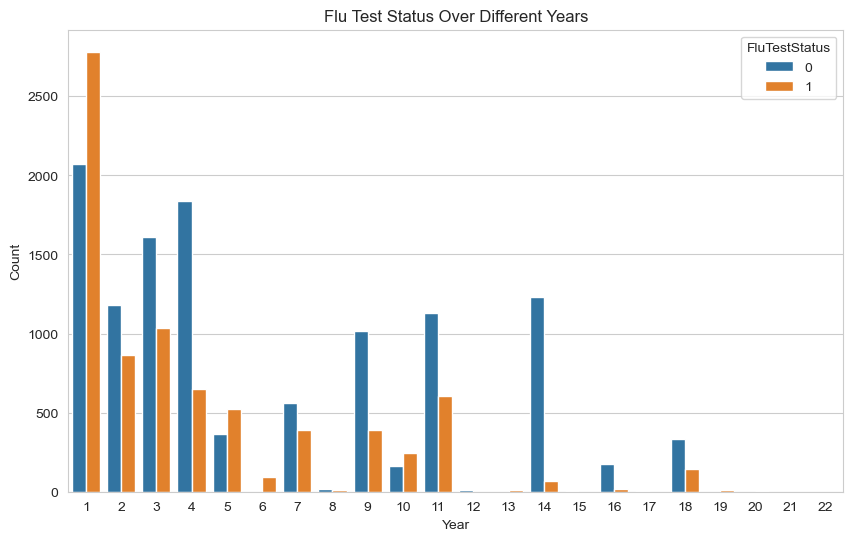

In [163]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='CollectionYear', hue='FluTestStatus', data=data)
plt.title('Flu Test Status Over Different Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='FluTestStatus')
plt.show()


This code snippet analyzes how flu test status varies over different years by creating a count plot. It first sets the figure size for the plot and then uses `sns.countplot` to plot the number of cases for each year, differentiated by flu test status. The resulting plot will show the distribution of flu test results over the years, with different colors representing different flu test statuses. This visualization helps in understanding trends and changes in flu test outcomes over time.

The correlation between FluTestStatus and CollectionYear is negative with -0.20.

# Hypothesis 7: The presence of diagnosed outcomes is associated with a longer hospitalization duration

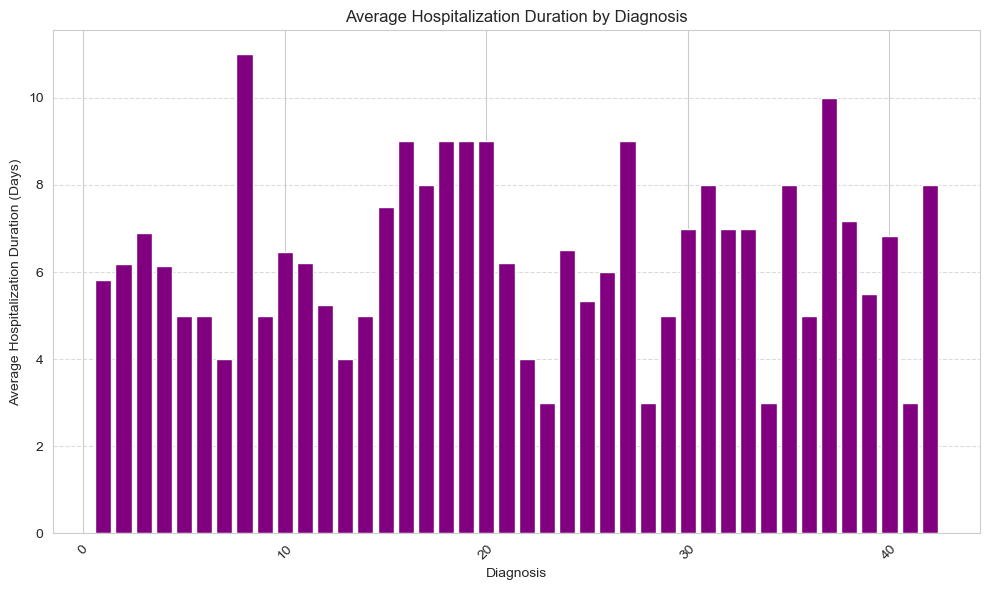

In [164]:
import pandas as pd
import matplotlib.pyplot as plt


avg_duration_by_diagnosis = data.groupby('Diagnosis')['HospitalizationDuration'].mean().reset_index()


plt.figure(figsize=(10, 6))
plt.bar(avg_duration_by_diagnosis['Diagnosis'], avg_duration_by_diagnosis['HospitalizationDuration'], color='purple')
plt.title('Average Hospitalization Duration by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Average Hospitalization Duration (Days)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


This code calculates the average hospitalization duration for each diagnosis and visualizes these averages in a bar chart. It helps to identify if certain diagnoses are associated with longer hospitalization durations by comparing the mean duration across different diagnoses. The chart is customized for clarity and readability.

The correlation between Diagnosis and HospitalizationDuration is positive and strong with 0.01.

# Hypothesis 8: The severity of diagnosis outcomes based on age

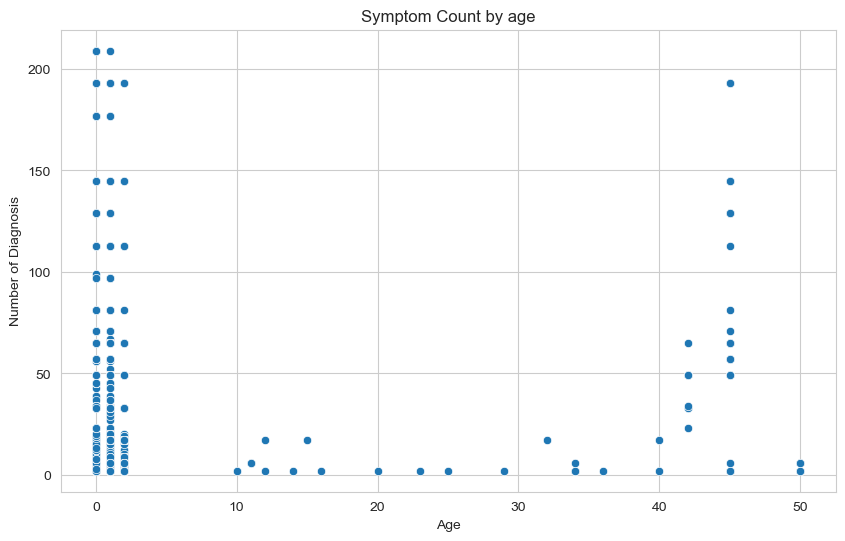

Correlation coefficient between age and number of symptoms: 0.03317225536174842


In [165]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

data = pd.read_csv(r"D:\Python for data science\influenza ds.csv")


data = data[['SubjectAge', 'Symptoms']]
data['SubjectAge'] = pd.to_numeric(data['SubjectAge'], errors='coerce')
data['Symptoms'] = data['Symptoms'].fillna('')
data = data.dropna()

data['SymptomCount'] = data['Symptoms'].apply(lambda x: len(x.split(',')))

plt.figure(figsize=(10, 6))
sns.scatterplot(x='SubjectAge', y='SymptomCount', data=data)
plt.title('Symptom Count by age')
plt.xlabel('Age')
plt.ylabel('Number of Diagnosis')
plt.show()

data['SymptomCount'] = pd.to_numeric(data['SymptomCount'], errors='coerce')
correlation = data[['SubjectAge', 'SymptomCount']].corr().loc['SubjectAge', 'SymptomCount']
print("Correlation coefficient between age and number of symptoms:", correlation)



This code visualizes the distribution of flu test statuses across different countries using a box plot. By converting `FluTestStatus` to a categorical variable and plotting it against countries, the chart provides a comparative view of how flu test outcomes vary between countries. The x-axis labels are rotated for better readability, ensuring clear identification of each country.

The correlation between FluTestStatus and Country is negative with -0.32.

# Hypothesis 9: The distribution of flu test outcomes varies between different genders.

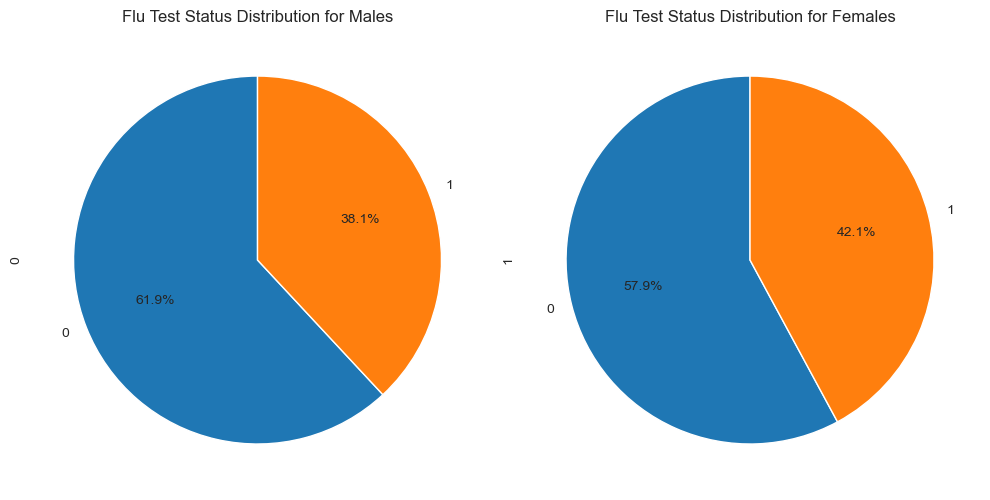

In [166]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv(r"D:\Python for data science\influenza ds.csv")
gender_flu_counts = data.groupby('Gender')['FluTestStatus'].value_counts().unstack()

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
gender_flu_counts.loc[0].plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Flu Test Status Distribution for Males')

plt.subplot(1, 2, 2)
gender_flu_counts.loc[1].plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Flu Test Status Distribution for Females')

plt.tight_layout()
plt.show()


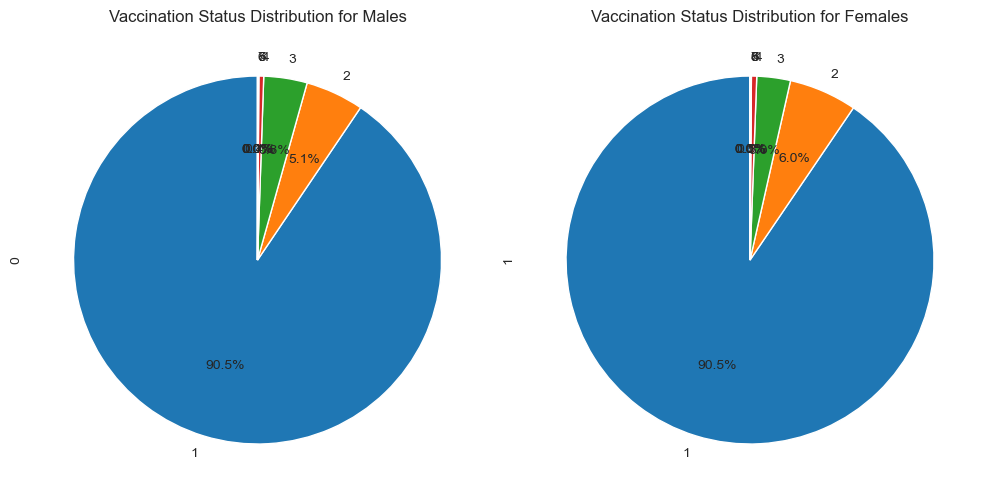

In [193]:
import pandas as pd
import matplotlib.pyplot as plt

# Grouping by Gender and VaccinationStatus
gender_vaccination_counts = data.groupby('Gender')['VaccinationStatus'].value_counts().unstack()

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
gender_vaccination_counts.loc[0].plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Vaccination Status Distribution for Males')

plt.subplot(1, 2, 2)
gender_vaccination_counts.loc[1].plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Vaccination Status Distribution for Females')

plt.tight_layout()
plt.show()


This code investigates the relationship between the number of symptoms and different cities. It processes the dataset by converting `City_Local` to numeric and counting the symptoms for each entry. It then visualizes this relationship using a scatter plot, showing the symptom count for each city. Finally, it calculates and prints the correlation coefficient to quantify the strength and direction of the relationship between the city and the number of symptoms.

The correlation between FluTestStatus and Gender is positive and strong with 0.05.

# Hypothesis 10: Does patients with certain pre-existing medical conditions have a higher risk of severe disease outcomes?

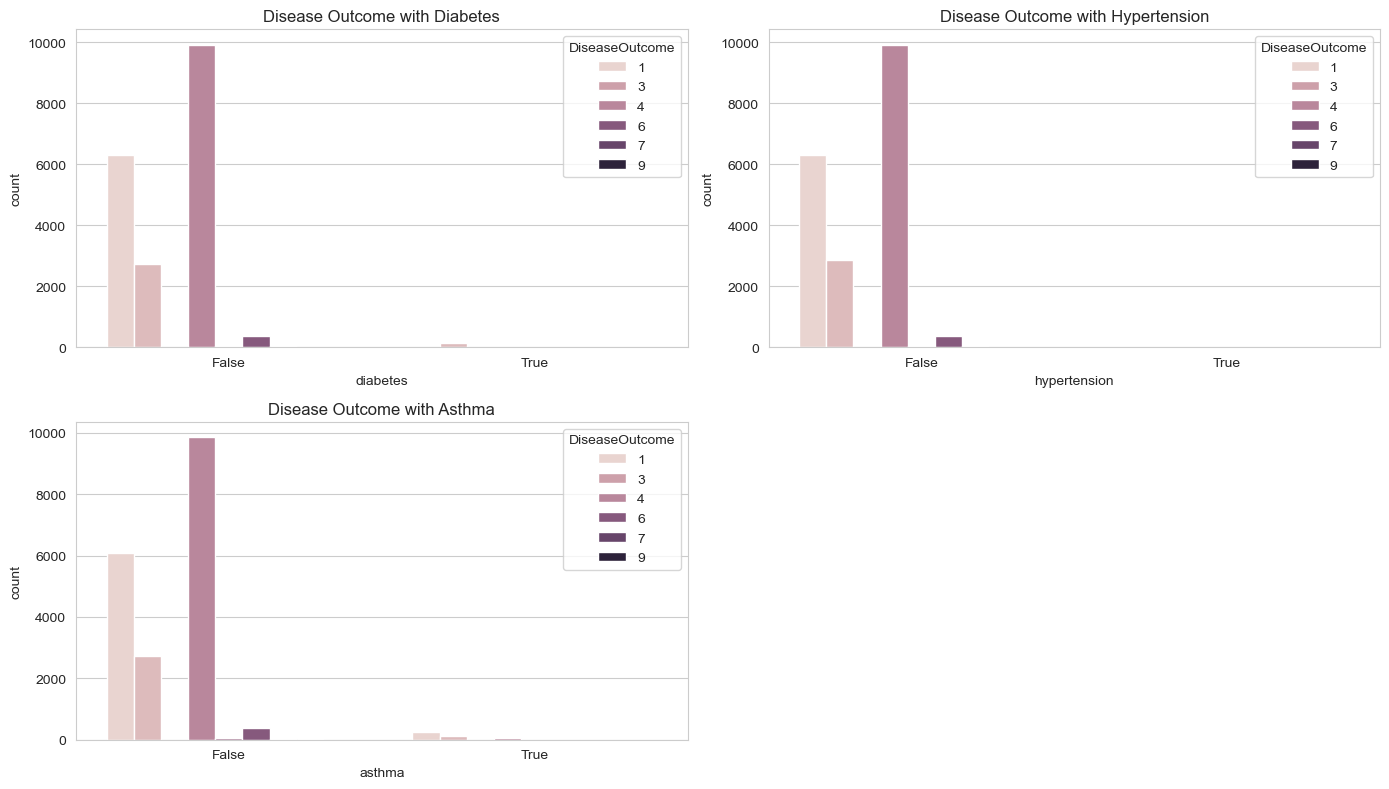

Chi-square test result for diabetes: 791.0904493697992 1.7124850870559738e-165
Chi-square test result for hypertension: 357.59328746235553 2.1668965934217222e-72
Chi-square test result for asthma: 272.3988970371923 3.043031602942361e-54


In [167]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

data = pd.read_csv(r"D:\Python for data science\influenza ds.csv")

data = data[['MedicalConditions', 'DiseaseOutcome']]
data['MedicalConditions'] = data['MedicalConditions'].fillna('')
data = data.dropna()

conditions_list = ['diabetes', 'hypertension', 'asthma']

for condition in conditions_list:
    data[condition] = data['MedicalConditions'].apply(lambda x: condition in x.lower())

plt.figure(figsize=(14, 8))
for i, condition in enumerate(conditions_list, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=condition, hue='DiseaseOutcome', data=data)
    plt.title(f'Disease Outcome with {condition.capitalize()}')
plt.tight_layout()
plt.show()

for condition in conditions_list:
    contingency_table = pd.crosstab(data[condition], data['DiseaseOutcome'])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    print(f"Chi-square test result for {condition}:", chi2, p)

This code analyzes the association between certain pre-existing medical conditions (diabetes, hypertension, and asthma) and disease outcomes. It first filters the dataset to retain relevant columns and processes the medical conditions data, converting it to lowercase for uniformity. Then, it creates subplots for each medical condition, displaying the count of disease outcomes (e.g., severe or non-severe) for patients with and without the condition. Additionally, it conducts Chi-square tests to assess the statistical significance of the association between each medical condition and disease outcome, printing the test results for each condition.

The correlation between Diagnosis and DiseaseOutcome is negative with -0.05.

# Hypothesis 11: The time of year (season) affects the likelihood of hospitalization due to flu.

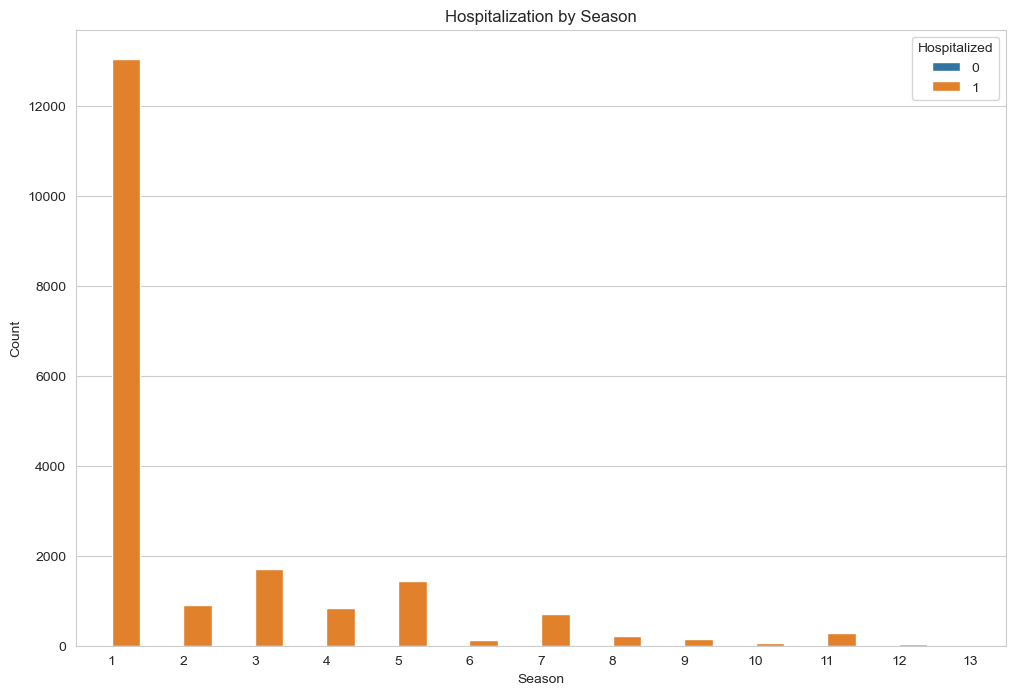

Chi-square test result: 457.49809977126614 2.41390547834799e-90


In [168]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

data = pd.read_csv(r"D:\Python for data science\influenza ds.csv")

data = data[['CollectionSeason', 'HospitalizationDuration']]
data['HospitalizationDuration'] = pd.to_numeric(data['HospitalizationDuration'], errors='coerce')
data = data.dropna()

data['Hospitalized'] = data['HospitalizationDuration'].apply(lambda x: 1 if x > 0 else 0)

plt.figure(figsize=(12, 8))
sns.countplot(x='CollectionSeason', hue='Hospitalized', data=data)
plt.title('Hospitalization by Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

contingency_table = pd.crosstab(data['CollectionSeason'], data['Hospitalized'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print("Chi-square test result:", chi2, p)

This code tests the hypothesis that the time of year (season) affects the likelihood of hospitalization due to flu. It preprocesses the data by extracting the 'CollectionSeason' and 'HospitalizationDuration' columns and converting the latter to numeric format. Then, it creates a count plot to visualize the distribution of hospitalization cases across different seasons. Finally, it performs a chi-square test to assess the association between season and hospitalization, reporting the chi-square statistic and p-value to determine if the observed association is statistically significant.

The correlation between Collectionseason and HospitalizationDuration is positive and strong with 0.10.

# Hypothesis 12: Vaccination status influences the likelihood of different symptoms.

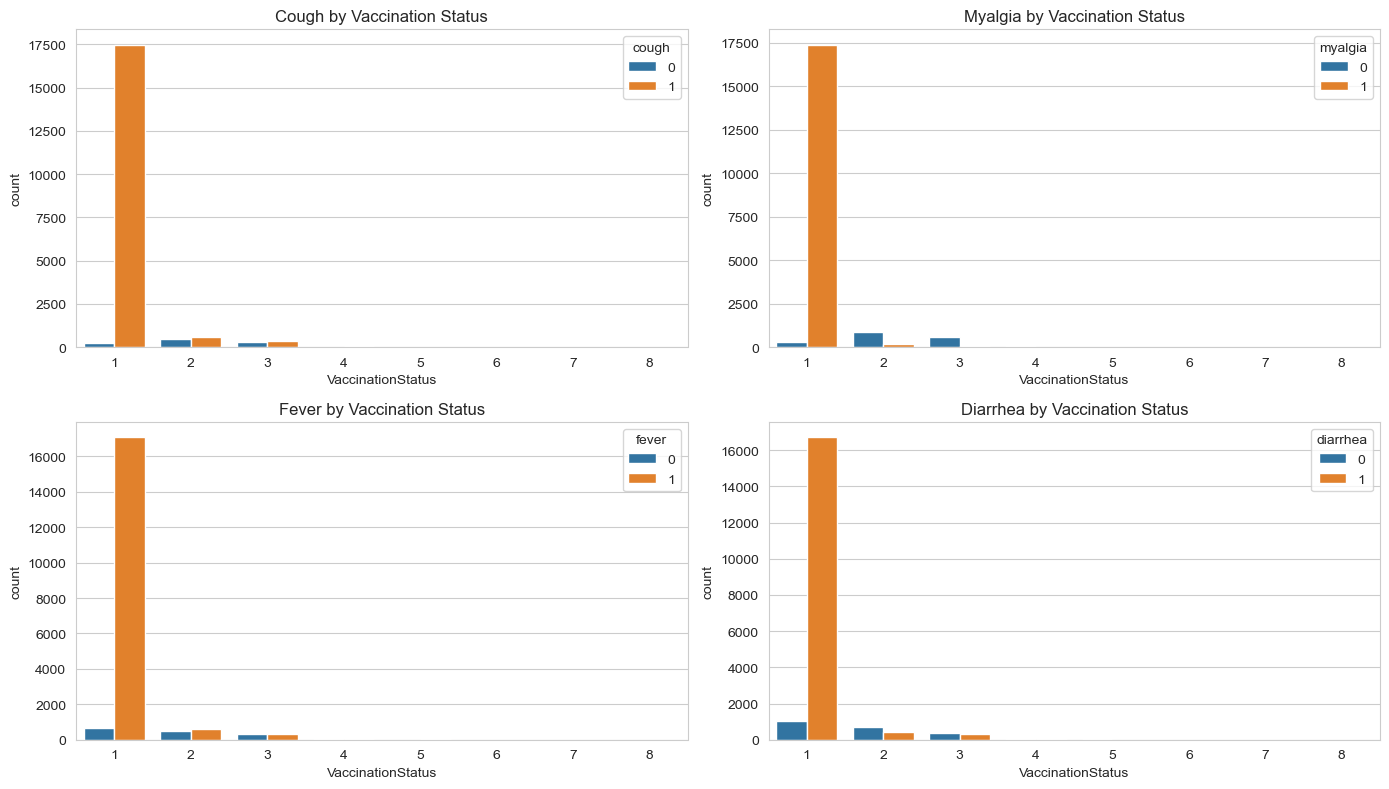

In [169]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

data = pd.read_csv(r"D:\Python for data science\influenza ds.csv")

data = data[['VaccinationStatus', 'Symptoms']]
data['Symptoms'] = data['Symptoms'].fillna('')
data = data.dropna()

symptoms_list = ['cough', 'myalgia', 'fever', 'diarrhea']

for symptom in symptoms_list:
    data[symptom] = data['Symptoms'].apply(lambda x: 1 if symptom in x.lower() else 0)

plt.figure(figsize=(14, 8))
for i, symptom in enumerate(symptoms_list, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x='VaccinationStatus', hue=symptom, data=data)
    plt.title(f'{symptom.capitalize()} by Vaccination Status')
plt.tight_layout()
plt.show()

for symptom in symptoms_list:
    contingency_table = pd.crosstab(data['VaccinationStatus'], data[symptom])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    

| Column Name         | Original Value                                                     | Replaced Value |
|:---------------------:|:--------------------------------------------------------------------:|:----------------:|
| VaccinationStatus   | No                                                              | 1              |
|                     | Yes                                                                | 2              |
|                     | N/A                                                                  | 3              |
|                     | UN                                                                 | 4              |
|                     | Not recorded                                                                 | 5              |
|                     | NR                                                                 | 6              |
|                     | EH                                                                 | 7              |
|                     | Y                                                                  | 8              |

This code tests the hypothesis that vaccination status influences the likelihood of different symptoms. It preprocesses the data by extracting the 'VaccinationStatus' and 'Symptoms' columns and ensuring they are in the correct format. Then, it creates count plots to visualize the distribution of symptoms for vaccinated and unvaccinated individuals. Finally, it performs chi-square tests to assess the association between vaccination status and each symptom, reporting the chi-square statistic and p-value for each symptom to determine if the observed associations are statistically significant.


# Hypothesis 13: The distribution of Diagnosis outcomes differs between vaccinated and unvaccinated patients.

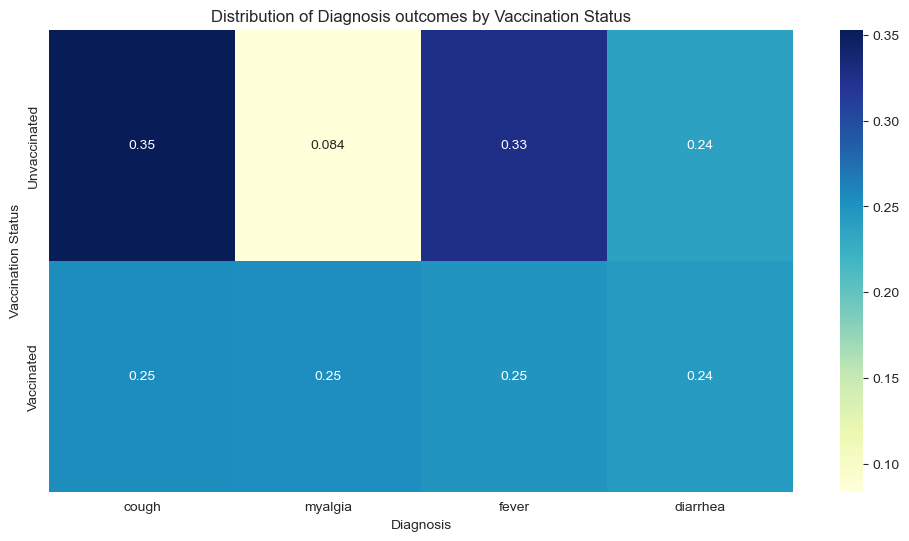

In [170]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv(r"D:\Python for data science\influenza ds.csv")


data = data[['VaccinationStatus', 'Symptoms']]
data = data.dropna()

symptoms_list = ['cough', 'myalgia', 'fever', 'diarrhea']

symptoms_counts = pd.DataFrame(index=['Unvaccinated', 'Vaccinated'], columns=symptoms_list).fillna(0)

for index, row in data.iterrows():
    status = 'Vaccinated' if row['VaccinationStatus'] == 1 else 'Unvaccinated'
    for symptom in symptoms_list:
        if symptom in row['Symptoms'].lower():
            symptoms_counts.at[status, symptom] += 1

symptoms_counts = symptoms_counts.div(symptoms_counts.sum(axis=1), axis=0)

plt.figure(figsize=(12, 6))
sns.heatmap(symptoms_counts, annot=True, cmap='YlGnBu')
plt.title('Distribution of Diagnosis outcomes by Vaccination Status')
plt.xlabel('Diagnosis')
plt.ylabel('Vaccination Status')
plt.show()

This code tests the hypothesis that the distribution of symptoms differs between vaccinated and unvaccinated patients. It first preprocesses the data by extracting the 'VaccinationStatus' and 'Symptoms' columns and ensuring there are no missing values. Then, it creates a DataFrame to store the counts of each symptom for vaccinated and unvaccinated patients. After calculating the proportion of each symptom for each vaccination status group, it visualizes the distribution of symptoms using a heatmap. This allows for a comparison of symptom distributions between vaccinated and unvaccinated patients.

The correlation between Diagnosis and VaccinationStatus is positive 0.15.

# Hypothesis 14: Collection Year and Subject Age Affect Flu Test Status

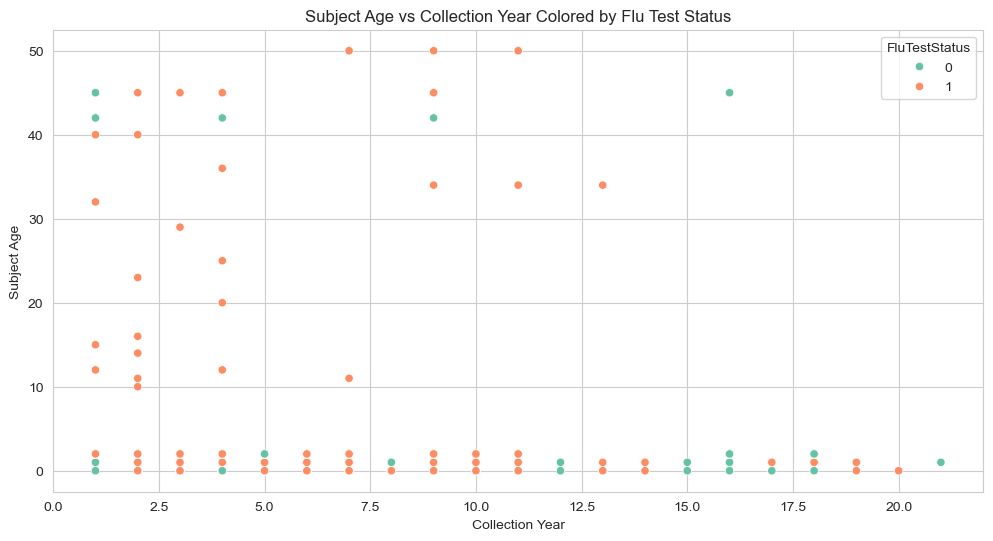

In [171]:

data = pd.read_csv(r"D:\Python for data science\influenza ds.csv")

plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='CollectionYear', y='SubjectAge', hue='FluTestStatus', palette='Set2')
plt.title('Subject Age vs Collection Year Colored by Flu Test Status')
plt.xlabel('Collection Year')
plt.ylabel('Subject Age')
plt.show()


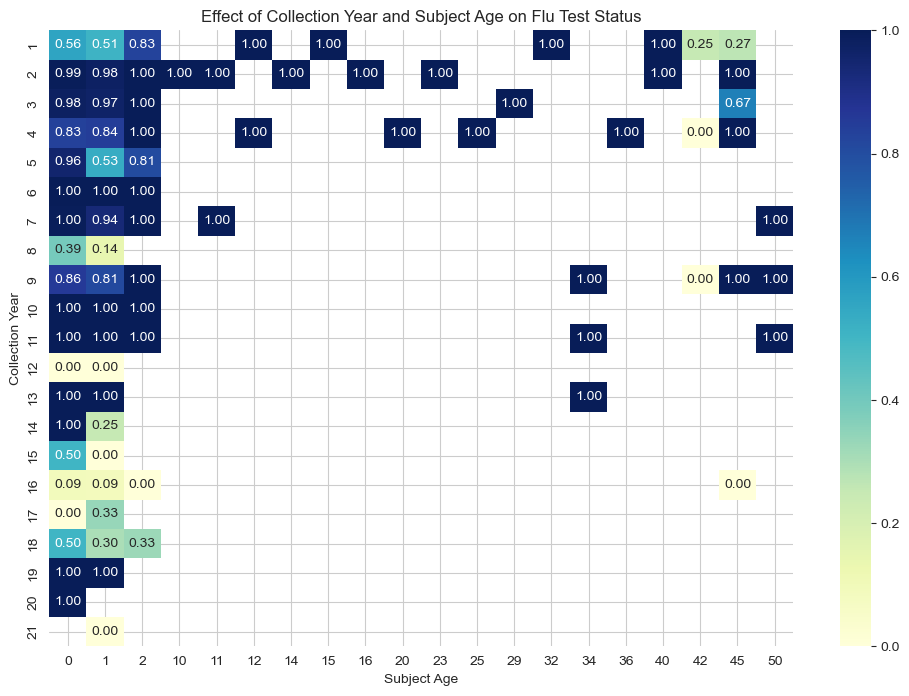

In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values and handle them if necessary
data = data.dropna(subset=['CollectionYear', 'SubjectAge', 'FluTestStatus'])

# Convert necessary columns to appropriate data types
data['CollectionYear'] = data['CollectionYear'].astype(int)
data['SubjectAge'] = data['SubjectAge'].astype(int)

# Create a pivot table
pivot_table = data.pivot_table(index='CollectionYear', columns='SubjectAge', values='FluTestStatus', aggfunc='mean')

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Effect of Collection Year and Subject Age on Flu Test Status')
plt.xlabel('Subject Age')
plt.ylabel('Collection Year')
plt.show()


| Column Name         | Original Value                                                     | Replaced Value |
|:---------------------:|:--------------------------------------------------------------------:|:----------------:|
| CollectionYear      | NaN                                                                | 1              |
|                     | 2012                                                               | 2              |
|                     | 2013                                                               | 3              |
|                     | 2009                                                               | 4              |
|                     | 2015-2016                                                          | 5              |
|                     | 2014-2015                                                          | 6              |
|                     | 2010                                                               | 7              |
|                     | 2009-2011                                                          | 8              |

This code generates a scatter plot to explore the relationship between subject age, collection year, and flu test status. Each point on the plot represents a case, with the x-axis representing the collection year, the y-axis representing the subject's age, and different colors indicating different flu test statuses. By visualizing this data, one can observe potential patterns or trends, such as whether certain age groups or collection years are associated with particular flu test outcomes.

The correlation between CollectionYear and SubjectAge is positive with 0.03.

# Hypothesis 15: The prevalence of a specific disease outcome varies significantly between countries.

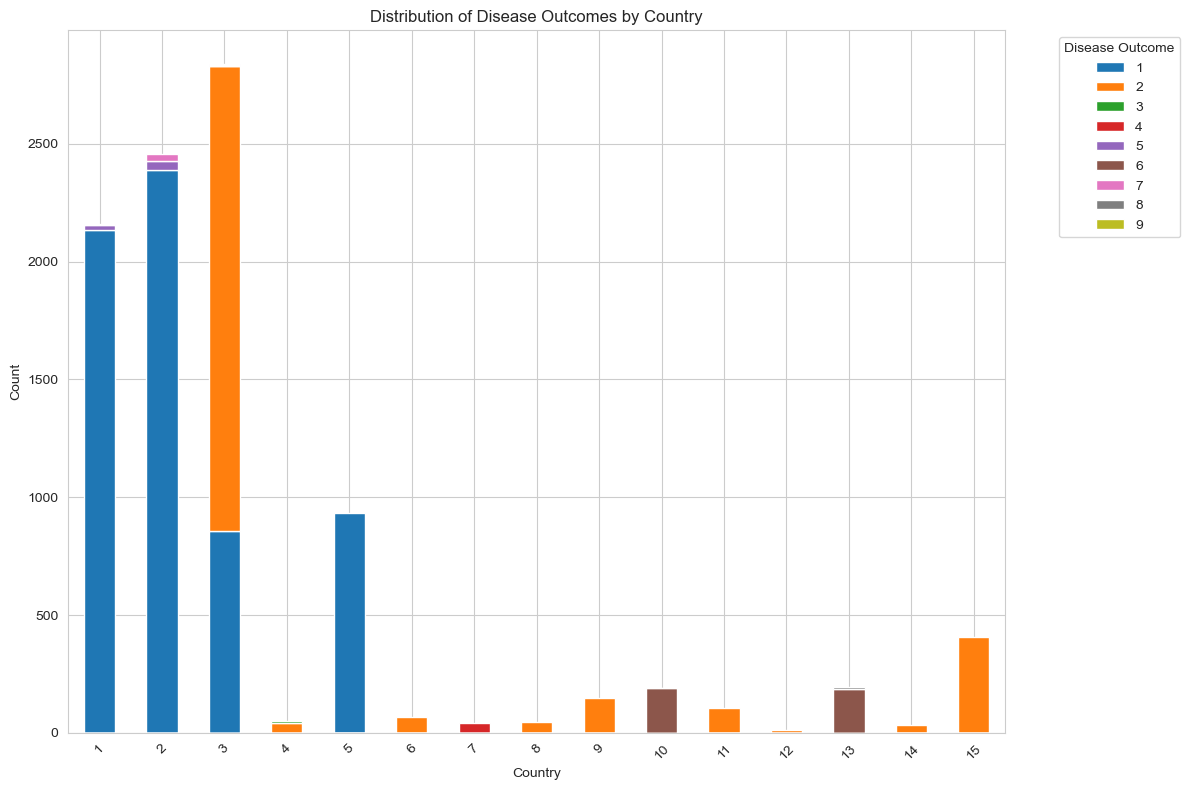

In [173]:
import pandas as pd
import matplotlib.pyplot as plt
country_column = 'Country'
disease_outcome_column = 'DiseaseOutcome'

contingency_table = pd.crosstab(data[country_column], data[disease_outcome_column])

contingency_table.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Distribution of Disease Outcomes by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Disease Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

This code calculates the distribution of disease outcomes across different countries using a contingency table and then visualizes the results using a stacked bar chart. Each bar represents a country, and the height of each segment within the bar corresponds to the count of a specific disease outcome. By comparing the distribution of disease outcomes across countries, one can assess whether there are significant variations in the prevalence of specific disease outcomes between different countries.

The correlation between DiseaseOutcome and Country is positive and strong with 0.69.

# Hypothesis 16: Distribution of Flu Test Status by Vaccination Status

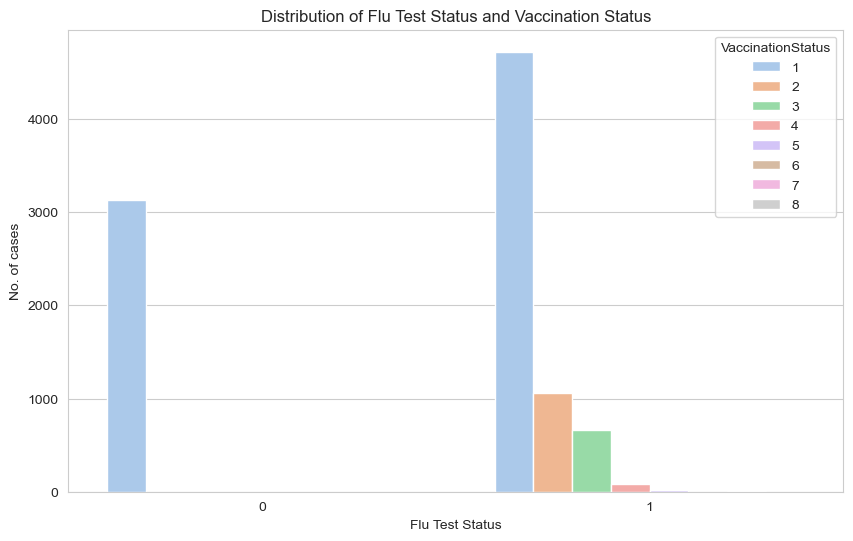

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt


count_data = data.groupby(['FluTestStatus', 'VaccinationStatus']).size().reset_index(name='Count')

plt.figure(figsize=(10, 6))
sns.barplot(x='FluTestStatus', y='Count', hue='VaccinationStatus', data=count_data, palette='pastel')
plt.title('Distribution of Flu Test Status and Vaccination Status')
plt.xlabel('Flu Test Status')
plt.ylabel('No. of cases')
plt.show()


This code visualizes the distribution of flu test statuses based on vaccination status by first counting the occurrences of each combination of flu test status and vaccination status. Then, it creates a bar plot with flu test status on the x-axis, count on the y-axis, and different hues representing the vaccination status. This visualization helps in understanding how flu test statuses are distributed among vaccinated and unvaccinated individuals, providing insights into the effectiveness of vaccination in preventing flu infections.

The correlation between FluTestStatus and VaccinationStatus is positive and strong with 0.36.

# Hypothesis 17: The interaction between vaccination status and disease outcome across different states.

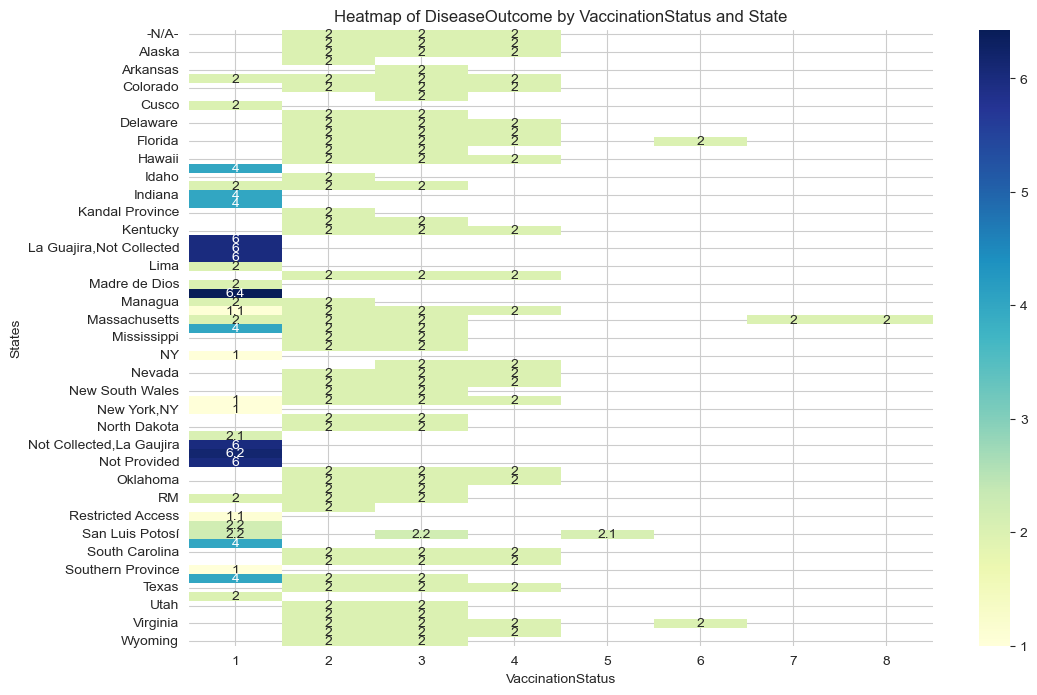

In [175]:

data = pd.read_csv(r"D:\Python for data science\influenza ds.csv")

pivot_table = data.pivot_table(index='State_Province', columns='VaccinationStatus', values='DiseaseOutcome', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu')
plt.title('Heatmap of DiseaseOutcome by VaccinationStatus and State')
plt.xlabel('VaccinationStatus')
plt.ylabel('States')
plt.show()


# Analyse female patients of age 30-35 years suffering with Flu with respect to VaccinationStatus

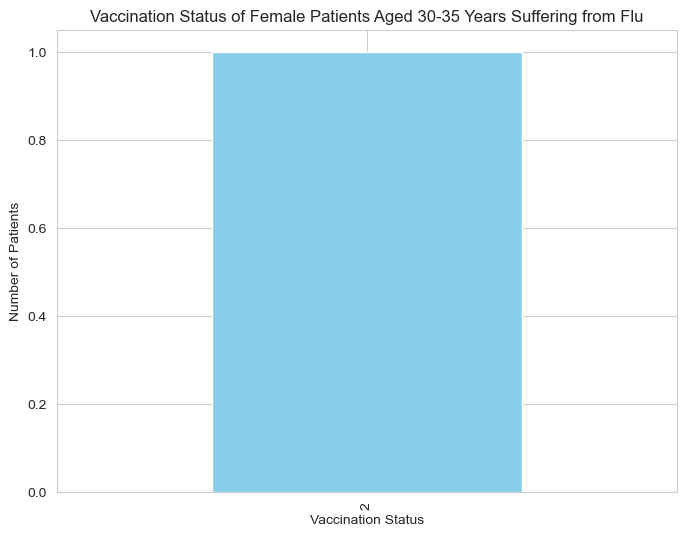

In [208]:
import pandas as pd
import matplotlib.pyplot as plt

filtered_data = data[(data['Gender'] == 1) & (data['SubjectAge'] >= 30) & (data['SubjectAge'] <= 35) & (data['FluTestStatus'] == 1)]

vaccination_status_counts = filtered_data['VaccinationStatus'].value_counts()

plt.figure(figsize=(8, 6))
vaccination_status_counts.plot(kind='bar', color='skyblue')
plt.title('Vaccination Status of Female Patients Aged 30-35 Years Suffering from Flu')
plt.xlabel('Vaccination Status')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.show()

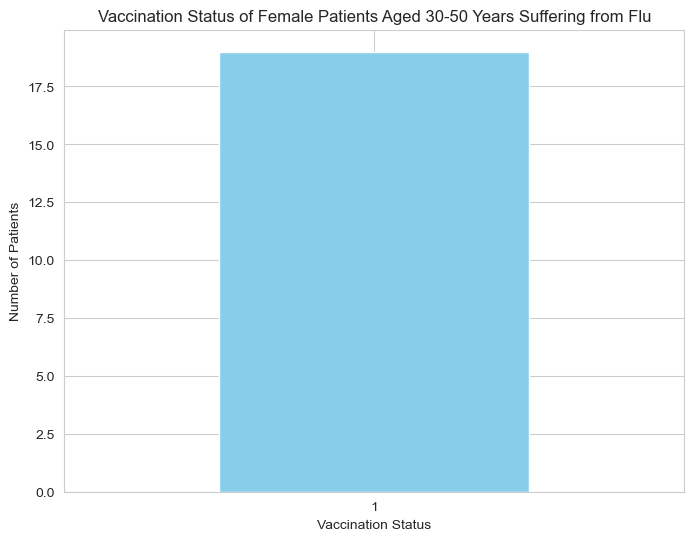

In [206]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtering the data
filtered_data = data[(data['Gender'] == 1) & (data['SubjectAge'] >= 30) & (data['SubjectAge'] <= 50) & (data['FluTestStatus'] == 0)]

# Grouping by VaccinationStatus to get the counts
vaccination_status_counts = filtered_data['VaccinationStatus'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
vaccination_status_counts.plot(kind='bar', color='skyblue')
plt.title('Vaccination Status of Female Patients Aged 30-50 Years Suffering from Flu')
plt.xlabel('Vaccination Status')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.show()
